In [ ]:
conda install git
conda install pip
pip install git+git://github.com/Netflix/metaflow.git

In [26]:
# importing required packages
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential 
from tensorflow.keras.regularizers import L2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import cross_val_score, train_test_split

In [12]:
# import a dataset of your choice. I am using MNIST here 

from tensorflow.keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

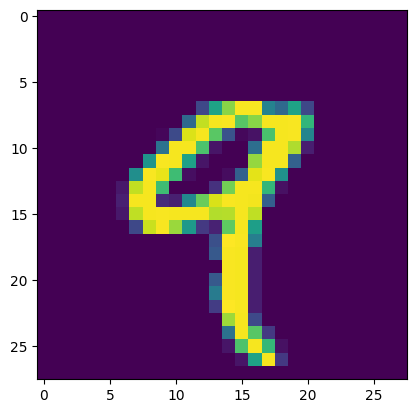

In [13]:
# printing the 4th image from training 
plt.imshow(X_train[4])

In [15]:
# Spliting training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=120)

# starting with a 1 layer NN 
opt_1 = Adam(learning_rate = 0.01)
model_1 = Sequential([layers.Input((28,28)), # each image is 28x28 in dimension
                      layers.Lambda(lambda x: x/255), #normalising layer
                      layers.Flatten(),
                      layers.Dense(10,activation = 'softmax')])

model_1.compile(optimizer = opt_1, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

History = model_1.fit(x = X_train, y = y_train, validation_data = (X_val, y_val), batch_size = 100, epochs= 10)

# for this model, the val_loss is 0.3381 and val_accuracy is 0.9089

Epoch 1/10
420/420 [==============================] - 1s 1ms/step - loss: 0.3771 - accuracy: 0.8914 - val_loss: 0.3175 - val_accuracy: 0.9121
Epoch 2/10
420/420 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 0.9163 - val_loss: 0.3053 - val_accuracy: 0.9168
Epoch 3/10
420/420 [==============================] - 0s 1ms/step - loss: 0.2879 - accuracy: 0.9200 - val_loss: 0.2940 - val_accuracy: 0.9218
Epoch 4/10
420/420 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.9215 - val_loss: 0.3023 - val_accuracy: 0.9213
Epoch 5/10
420/420 [==============================] - 0s 1ms/step - loss: 0.2722 - accuracy: 0.9237 - val_loss: 0.3137 - val_accuracy: 0.9162
Epoch 6/10
420/420 [==============================] - 0s 1ms/step - loss: 0.2702 - accuracy: 0.9233 - val_loss: 0.3306 - val_accuracy: 0.9127
Epoch 7/10
420/420 [==============================] - 0s 1ms/step - loss: 0.2703 - accuracy: 0.9235 - val_loss: 0.3255 - val_accuracy: 0.9130
Epoch 

In [ ]:
# plotting validation loss and accuracy

plt.plot(History.history['loss'])
plt.title('Loss Function Over Epochs')
plt.ylabel('Loss (sparse categorical crossentropy) value')
plt.xlabel('Number of epoch')
plt.show()
plt.plot(History.history['val_accuracy'])
plt.title('Validation accuracy Over Epochs')
plt.ylabel('Validation accuracy')
plt.xlabel('Number of epoch')
plt.show()

In [16]:
# defining a function with all hyperparameters being inputs of the function

def buildModel(neurons, activation, dropout,learning_rate, kernel_regularizer):
    # Initialising the ANN
    classifier =Sequential([layers.Input((28,28)),                       
                      layers.Lambda(lambda x: x/255), #normalising layer
                      layers.Flatten(),
                      layers.Dense(neurons, activation = activation, kernel_regularizer = L2(kernel_regularizer)),
                      layers.Dropout(dropout), 
                      layers.Dense(10, activation = 'softmax')])
    
    # Compiling the ANN
    classifier.compile(loss='sparse_categorical_crossentropy', 
                       optimizer= Adam(learning_rate = learning_rate), metrics=['accuracy'])
    
    
    return classifier

In [17]:

# using kerasclassifier to perform grid search, the code is developed using functions on the following website
# https://www.adriangb.com/scikeras/stable/generated/scikeras.wrappers.KerasClassifier.html
    
classifier = KerasClassifier(build_fn = buildModel)

# various hyperparameter values we want to test
parameters = {'batch_size':  [300, 500],
              'epochs': [20, 50, 100],
              "activation": ['relu', 'sigmoid'],
              "dropout":[0.05, 0.1, 0.2],
              "learning_rate":[0.01, 0.1],
              "kernel_regularizer" : [0.02, 0.4],
              "neurons":[100, 182]
             }
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           cv = 2)

# does not need training and validation data separately
grid_search = grid_search.fit(X, y)

# note: if you have a large dataset, it may take a long time to run depending on your GPU if multiple values for the hyperparameters are specified
# in such cases, run cross validation on small subsets of hyperparameter values and update them based on the results achieved


Epoch 1/20


/var/folders/f8/x7313zpd31v5yyfbr5c8sf840000gn/T/ipykernel_32997/2301272490.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = buildModel)


300/300 [==============================] - 1s 2ms/step - loss: 0.2731 - accuracy: 0.9162
Epoch 2/20
300/300 [==============================] - 0s 2ms/step - loss: 0.1407 - accuracy: 0.9558
Epoch 3/20
300/300 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9668
Epoch 4/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.9708
Epoch 5/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0766 - accuracy: 0.9763
Epoch 6/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0881 - accuracy: 0.9736
Epoch 7/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0662 - accuracy: 0.9796
Epoch 8/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0668 - accuracy: 0.9792
Epoch 9/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0655 - accuracy: 0.9805
Epoch 10/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9800
Epoch 11/2

300/300 [==============================] - 0s 2ms/step - loss: 0.7567 - accuracy: 0.7872
Epoch 20/20
300/300 [==============================] - 0s 919us/step - loss: 0.9397 - accuracy: 0.8259
Epoch 1/20
300/300 [==============================] - 1s 2ms/step - loss: 0.2846 - accuracy: 0.9137
Epoch 2/20
300/300 [==============================] - 0s 2ms/step - loss: 0.1451 - accuracy: 0.9549
Epoch 3/20
300/300 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9641
Epoch 4/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9703
Epoch 5/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0845 - accuracy: 0.9746
Epoch 6/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0754 - accuracy: 0.9763
Epoch 7/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0792 - accuracy: 0.9770
Epoch 8/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9812
Epoch 9/

300/300 [==============================] - 1s 2ms/step - loss: 0.0498 - accuracy: 0.9912
Epoch 38/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0497 - accuracy: 0.9914
Epoch 39/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9925
Epoch 40/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9927
Epoch 41/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0463 - accuracy: 0.9923
Epoch 42/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0553 - accuracy: 0.9917
Epoch 43/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0418 - accuracy: 0.9928
Epoch 44/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9935
Epoch 45/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9936
Epoch 46/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9938
Ep

300/300 [==============================] - 0s 2ms/step - loss: 0.7701 - accuracy: 0.7644
Epoch 17/50
300/300 [==============================] - 0s 2ms/step - loss: 0.7612 - accuracy: 0.7679
Epoch 18/50
300/300 [==============================] - 0s 2ms/step - loss: 0.7626 - accuracy: 0.7652
Epoch 19/50
300/300 [==============================] - 0s 2ms/step - loss: 0.7705 - accuracy: 0.7707
Epoch 20/50
300/300 [==============================] - 0s 2ms/step - loss: 0.7556 - accuracy: 0.7639
Epoch 21/50
300/300 [==============================] - 0s 1ms/step - loss: 0.8074 - accuracy: 0.7573
Epoch 22/50
300/300 [==============================] - 0s 2ms/step - loss: 0.8047 - accuracy: 0.7486
Epoch 23/50
300/300 [==============================] - 0s 1ms/step - loss: 0.7212 - accuracy: 0.7737
Epoch 24/50
300/300 [==============================] - 0s 2ms/step - loss: 0.7745 - accuracy: 0.7792
Epoch 25/50
300/300 [==============================] - 0s 2ms/step - loss: 0.8267 - accuracy: 0.7670
Ep

300/300 [==============================] - 0s 2ms/step - loss: 0.7862 - accuracy: 0.7816
Epoch 47/50
300/300 [==============================] - 0s 2ms/step - loss: 0.7477 - accuracy: 0.7852
Epoch 48/50
300/300 [==============================] - 0s 2ms/step - loss: 0.7106 - accuracy: 0.7946
Epoch 49/50
300/300 [==============================] - 0s 2ms/step - loss: 0.7985 - accuracy: 0.7732
Epoch 50/50
300/300 [==============================] - 0s 945us/step - loss: 1.8027 - accuracy: 0.8121
Epoch 1/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2848 - accuracy: 0.9130
Epoch 2/50
300/300 [==============================] - 0s 2ms/step - loss: 0.1385 - accuracy: 0.9572
Epoch 3/50
300/300 [==============================] - 0s 2ms/step - loss: 0.1095 - accuracy: 0.9663
Epoch 4/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0911 - accuracy: 0.9714
Epoch 5/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0810 - accuracy: 0.9753
Epoch

300/300 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9909
Epoch 26/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9921
Epoch 27/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9905
Epoch 28/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9910
Epoch 29/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0600 - accuracy: 0.9894
Epoch 30/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9893
Epoch 31/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9915
Epoch 32/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0476 - accuracy: 0.9916
Epoch 33/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9916
Epoch 34/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9916
Ep

300/300 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9938
Epoch 55/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9953
Epoch 56/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9929
Epoch 57/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9929
Epoch 58/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9945
Epoch 59/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9940
Epoch 60/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9943
Epoch 61/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9944
Epoch 62/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9949
Epoch 63/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 

300/300 [==============================] - 1s 2ms/step - loss: 0.0486 - accuracy: 0.9914
Epoch 34/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9913
Epoch 35/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9932
Epoch 36/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9923
Epoch 37/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9934
Epoch 38/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9931
Epoch 39/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9903
Epoch 40/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9921
Epoch 41/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9920
Epoch 42/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 

300/300 [==============================] - 1s 2ms/step - loss: 0.8524 - accuracy: 0.7668
Epoch 13/100
300/300 [==============================] - 1s 2ms/step - loss: 0.7965 - accuracy: 0.7854
Epoch 14/100
300/300 [==============================] - 0s 2ms/step - loss: 0.8077 - accuracy: 0.7893
Epoch 15/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7922 - accuracy: 0.7746
Epoch 16/100
300/300 [==============================] - 0s 2ms/step - loss: 0.8753 - accuracy: 0.7572
Epoch 17/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7812 - accuracy: 0.7927
Epoch 18/100
300/300 [==============================] - 1s 2ms/step - loss: 0.7380 - accuracy: 0.7986
Epoch 19/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7519 - accuracy: 0.8022
Epoch 20/100
300/300 [==============================] - 1s 2ms/step - loss: 0.7435 - accuracy: 0.7948
Epoch 21/100
300/300 [==============================] - 1s 2ms/step - loss: 0.7408 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.7828 - accuracy: 0.7782
Epoch 93/100
300/300 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.7884
Epoch 94/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7023 - accuracy: 0.7936
Epoch 95/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7075 - accuracy: 0.7911
Epoch 96/100
300/300 [==============================] - 1s 2ms/step - loss: 0.7680 - accuracy: 0.7715
Epoch 97/100
300/300 [==============================] - 1s 2ms/step - loss: 0.7599 - accuracy: 0.7865
Epoch 98/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7363 - accuracy: 0.7805
Epoch 99/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7001 - accuracy: 0.7843
Epoch 100/100
300/300 [==============================] - 0s 973us/step - loss: 2.7809 - accuracy: 0.7823
Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 1.0690 - accuracy

300/300 [==============================] - 0s 2ms/step - loss: 0.7866 - accuracy: 0.7700
Epoch 72/100
300/300 [==============================] - 0s 2ms/step - loss: 0.8135 - accuracy: 0.7600
Epoch 73/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7497 - accuracy: 0.7808
Epoch 74/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7855 - accuracy: 0.7772
Epoch 75/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7862 - accuracy: 0.7606
Epoch 76/100
300/300 [==============================] - 0s 2ms/step - loss: 0.8447 - accuracy: 0.7699
Epoch 77/100
300/300 [==============================] - 0s 2ms/step - loss: 0.8068 - accuracy: 0.7587
Epoch 78/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7775 - accuracy: 0.7763
Epoch 79/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7573 - accuracy: 0.7725
Epoch 80/100
300/300 [==============================] - 0s 2ms/step - loss: 0.7498 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9922
Epoch 51/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9937
Epoch 52/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9940
Epoch 53/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0331 - accuracy: 0.9944
Epoch 54/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9921
Epoch 55/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0412 - accuracy: 0.9931
Epoch 56/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9948
Epoch 57/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0361 - accuracy: 0.9938
Epoch 58/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9933
Epoch 59/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 

300/300 [==============================] - 1s 2ms/step - loss: 0.0516 - accuracy: 0.9895
Epoch 30/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0376 - accuracy: 0.9915
Epoch 31/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0468 - accuracy: 0.9902
Epoch 32/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0423 - accuracy: 0.9917
Epoch 33/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0666 - accuracy: 0.9891
Epoch 34/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0368 - accuracy: 0.9922
Epoch 35/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0368 - accuracy: 0.9929
Epoch 36/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9930
Epoch 37/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0451 - accuracy: 0.9919
Epoch 38/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9768
Epoch 9/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9764
Epoch 10/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9788
Epoch 11/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9794
Epoch 12/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0602 - accuracy: 0.9819
Epoch 13/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9801
Epoch 14/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0741 - accuracy: 0.9807
Epoch 15/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0700 - accuracy: 0.9810
Epoch 16/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9816
Epoch 17/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0615 - accuracy: 0.9842
Epo

Epoch 6/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0917 - accuracy: 0.9730
Epoch 7/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9738
Epoch 8/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9767
Epoch 9/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0705 - accuracy: 0.9790
Epoch 10/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0760 - accuracy: 0.9781
Epoch 11/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0734 - accuracy: 0.9790
Epoch 12/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9823
Epoch 13/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9809
Epoch 14/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0604 - accuracy: 0.9827
Epoch 15/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0

300/300 [==============================] - 0s 2ms/step - loss: 0.0540 - accuracy: 0.9906
Epoch 46/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9902
Epoch 47/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9912
Epoch 48/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0514 - accuracy: 0.9912
Epoch 49/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0477 - accuracy: 0.9916
Epoch 50/50
300/300 [==============================] - 0s 949us/step - loss: 0.4421 - accuracy: 0.9685
Epoch 1/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2869 - accuracy: 0.9114
Epoch 2/50
300/300 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.9530
Epoch 3/50
300/300 [==============================] - 0s 2ms/step - loss: 0.1165 - accuracy: 0.9632
Epoch 4/50
300/300 [==============================] - 0s 2ms/step - loss: 0.1002 - accuracy: 0.9684
Epoc

300/300 [==============================] - 0s 2ms/step - loss: 0.8484 - accuracy: 0.7524
Epoch 25/50
300/300 [==============================] - 0s 2ms/step - loss: 0.9137 - accuracy: 0.7298
Epoch 26/50
300/300 [==============================] - 0s 2ms/step - loss: 1.0052 - accuracy: 0.7028
Epoch 27/50
300/300 [==============================] - 0s 2ms/step - loss: 0.9913 - accuracy: 0.7020
Epoch 28/50
300/300 [==============================] - 0s 2ms/step - loss: 0.9463 - accuracy: 0.7053
Epoch 29/50
300/300 [==============================] - 0s 2ms/step - loss: 0.9772 - accuracy: 0.6978
Epoch 30/50
300/300 [==============================] - 0s 2ms/step - loss: 0.9264 - accuracy: 0.7042
Epoch 31/50
300/300 [==============================] - 0s 2ms/step - loss: 0.9106 - accuracy: 0.7235
Epoch 32/50
300/300 [==============================] - 0s 2ms/step - loss: 0.9636 - accuracy: 0.7139
Epoch 33/50
300/300 [==============================] - 0s 2ms/step - loss: 0.8859 - accuracy: 0.7323
Ep

300/300 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9632
Epoch 4/50
300/300 [==============================] - 0s 2ms/step - loss: 0.1061 - accuracy: 0.9681
Epoch 5/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0961 - accuracy: 0.9700
Epoch 6/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0900 - accuracy: 0.9731
Epoch 7/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9741
Epoch 8/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0808 - accuracy: 0.9757
Epoch 9/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9774
Epoch 10/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9776
Epoch 11/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9808
Epoch 12/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0629 - accuracy: 0.9819
Epoch 13

300/300 [==============================] - 1s 2ms/step - loss: 0.0455 - accuracy: 0.9901
Epoch 34/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0456 - accuracy: 0.9906
Epoch 35/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0543 - accuracy: 0.9891
Epoch 36/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9885
Epoch 37/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9904
Epoch 38/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9883
Epoch 39/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9918
Epoch 40/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0360 - accuracy: 0.9925
Epoch 41/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9901
Epoch 42/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0468 - accuracy: 0.9912
Ep

300/300 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9924
Epoch 63/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9943
Epoch 64/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9928
Epoch 65/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9933
Epoch 66/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0433 - accuracy: 0.9936
Epoch 67/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0664 - accuracy: 0.9907
Epoch 68/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9928
Epoch 69/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9938
Epoch 70/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9931
Epoch 71/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.0738 - accuracy: 0.9875
Epoch 42/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0498 - accuracy: 0.9906
Epoch 43/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0533 - accuracy: 0.9896
Epoch 44/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0431 - accuracy: 0.9913
Epoch 45/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9901
Epoch 46/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0500 - accuracy: 0.9909
Epoch 47/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0524 - accuracy: 0.9902
Epoch 48/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0474 - accuracy: 0.9910
Epoch 49/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0520 - accuracy: 0.9906
Epoch 50/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0524 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.8123 - accuracy: 0.7538
Epoch 21/100
300/300 [==============================] - 0s 2ms/step - loss: 0.8438 - accuracy: 0.7668
Epoch 22/100
300/300 [==============================] - 0s 2ms/step - loss: 0.8097 - accuracy: 0.7645
Epoch 23/100
300/300 [==============================] - 1s 2ms/step - loss: 0.8687 - accuracy: 0.7545
Epoch 24/100
300/300 [==============================] - 1s 2ms/step - loss: 0.8499 - accuracy: 0.7525
Epoch 25/100
300/300 [==============================] - 0s 2ms/step - loss: 0.9035 - accuracy: 0.7385
Epoch 26/100
300/300 [==============================] - 0s 2ms/step - loss: 0.8598 - accuracy: 0.7349
Epoch 27/100
300/300 [==============================] - 0s 2ms/step - loss: 0.8855 - accuracy: 0.7407
Epoch 28/100
300/300 [==============================] - 1s 2ms/step - loss: 0.9763 - accuracy: 0.7123
Epoch 29/100
300/300 [==============================] - 0s 2ms/step - loss: 0.9348 - accuracy: 

300/300 [==============================] - 0s 1ms/step - loss: 2.7658 - accuracy: 0.7519
Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 1.2759 - accuracy: 0.6978
Epoch 2/100
300/300 [==============================] - 1s 2ms/step - loss: 0.8256 - accuracy: 0.7414
Epoch 3/100
300/300 [==============================] - 1s 2ms/step - loss: 0.8804 - accuracy: 0.7296
Epoch 4/100
300/300 [==============================] - 0s 2ms/step - loss: 0.8446 - accuracy: 0.7399
Epoch 5/100
300/300 [==============================] - 1s 2ms/step - loss: 0.8667 - accuracy: 0.7268
Epoch 6/100
300/300 [==============================] - 0s 2ms/step - loss: 0.8872 - accuracy: 0.7251
Epoch 7/100
300/300 [==============================] - 0s 2ms/step - loss: 0.9628 - accuracy: 0.6943
Epoch 8/100
300/300 [==============================] - 0s 2ms/step - loss: 1.0030 - accuracy: 0.6982
Epoch 9/100
300/300 [==============================] - 0s 2ms/step - loss: 0.9906 - accuracy: 0.6919
Ep

300/300 [==============================] - 0s 2ms/step - loss: 0.9246 - accuracy: 0.6940
Epoch 80/100
300/300 [==============================] - 0s 2ms/step - loss: 0.8666 - accuracy: 0.7018
Epoch 81/100
300/300 [==============================] - 0s 2ms/step - loss: 0.9228 - accuracy: 0.6975
Epoch 82/100
300/300 [==============================] - 0s 2ms/step - loss: 0.9545 - accuracy: 0.6778
Epoch 83/100
300/300 [==============================] - 0s 2ms/step - loss: 0.9087 - accuracy: 0.6928
Epoch 84/100
300/300 [==============================] - 1s 2ms/step - loss: 0.9121 - accuracy: 0.6916
Epoch 85/100
300/300 [==============================] - 1s 2ms/step - loss: 1.0759 - accuracy: 0.6237
Epoch 86/100
300/300 [==============================] - 1s 2ms/step - loss: 0.9678 - accuracy: 0.6715
Epoch 87/100
300/300 [==============================] - 1s 2ms/step - loss: 1.0683 - accuracy: 0.6457
Epoch 88/100
300/300 [==============================] - 1s 2ms/step - loss: 0.9953 - accuracy: 

300/300 [==============================] - 1s 2ms/step - loss: 0.0436 - accuracy: 0.9931
Epoch 59/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9922
Epoch 60/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0556 - accuracy: 0.9912
Epoch 61/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0405 - accuracy: 0.9929
Epoch 62/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0427 - accuracy: 0.9927
Epoch 63/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0410 - accuracy: 0.9928
Epoch 64/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0435 - accuracy: 0.9933
Epoch 65/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0544 - accuracy: 0.9919
Epoch 66/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0452 - accuracy: 0.9931
Epoch 67/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0563 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.0657 - accuracy: 0.9886
Epoch 38/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0463 - accuracy: 0.9918
Epoch 39/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0507 - accuracy: 0.9901
Epoch 40/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9913
Epoch 41/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0631 - accuracy: 0.9892
Epoch 42/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0521 - accuracy: 0.9911
Epoch 43/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0583 - accuracy: 0.9906
Epoch 44/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9907
Epoch 45/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0562 - accuracy: 0.9914
Epoch 46/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.0921 - accuracy: 0.9759
Epoch 17/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0833 - accuracy: 0.9779
Epoch 18/20
300/300 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9785
Epoch 19/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9790
Epoch 20/20
300/300 [==============================] - 0s 943us/step - loss: 0.2363 - accuracy: 0.9658
Epoch 1/20
300/300 [==============================] - 1s 2ms/step - loss: 0.3102 - accuracy: 0.9047
Epoch 2/20
300/300 [==============================] - 0s 2ms/step - loss: 0.1726 - accuracy: 0.9477
Epoch 3/20
300/300 [==============================] - 0s 2ms/step - loss: 0.1499 - accuracy: 0.9543
Epoch 4/20
300/300 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9584
Epoch 5/20
300/300 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9633
Epoch

300/300 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9727
Epoch 15/20
300/300 [==============================] - 0s 2ms/step - loss: 0.1016 - accuracy: 0.9726
Epoch 16/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0807 - accuracy: 0.9774
Epoch 17/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0794 - accuracy: 0.9782
Epoch 18/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9769
Epoch 19/20
300/300 [==============================] - 0s 2ms/step - loss: 0.0859 - accuracy: 0.9786
Epoch 20/20
300/300 [==============================] - 0s 995us/step - loss: 0.2532 - accuracy: 0.9635
Epoch 1/20
300/300 [==============================] - 1s 2ms/step - loss: 0.3036 - accuracy: 0.9063
Epoch 2/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1734 - accuracy: 0.9478
Epoch 3/20
300/300 [==============================] - 1s 2ms/step - loss: 0.1424 - accuracy: 0.9560
Epo

300/300 [==============================] - 1s 2ms/step - loss: 0.1799 - accuracy: 0.9460
Epoch 3/50
300/300 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9541
Epoch 4/50
300/300 [==============================] - 0s 2ms/step - loss: 0.1337 - accuracy: 0.9587
Epoch 5/50
300/300 [==============================] - 1s 2ms/step - loss: 0.1237 - accuracy: 0.9621
Epoch 6/50
300/300 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9654
Epoch 7/50
300/300 [==============================] - 1s 2ms/step - loss: 0.1204 - accuracy: 0.9644
Epoch 8/50
300/300 [==============================] - 0s 2ms/step - loss: 0.1151 - accuracy: 0.9670
Epoch 9/50
300/300 [==============================] - 0s 2ms/step - loss: 0.1052 - accuracy: 0.9695
Epoch 10/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0932 - accuracy: 0.9727
Epoch 11/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9747
Epoch 12/

300/300 [==============================] - 0s 2ms/step - loss: 1.2644 - accuracy: 0.5316
Epoch 33/50
300/300 [==============================] - 0s 2ms/step - loss: 1.3002 - accuracy: 0.5363
Epoch 34/50
300/300 [==============================] - 0s 2ms/step - loss: 1.3591 - accuracy: 0.5190
Epoch 35/50
300/300 [==============================] - 0s 2ms/step - loss: 1.3389 - accuracy: 0.5137
Epoch 36/50
300/300 [==============================] - 0s 2ms/step - loss: 1.3481 - accuracy: 0.5071
Epoch 37/50
300/300 [==============================] - 0s 2ms/step - loss: 1.3555 - accuracy: 0.5167
Epoch 38/50
300/300 [==============================] - 0s 2ms/step - loss: 1.3719 - accuracy: 0.5121
Epoch 39/50
300/300 [==============================] - 0s 2ms/step - loss: 1.4013 - accuracy: 0.5083
Epoch 40/50
300/300 [==============================] - 0s 2ms/step - loss: 1.2879 - accuracy: 0.5395
Epoch 41/50
300/300 [==============================] - 0s 2ms/step - loss: 1.2981 - accuracy: 0.5278
Ep

300/300 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9745
Epoch 12/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0952 - accuracy: 0.9725
Epoch 13/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0956 - accuracy: 0.9725
Epoch 14/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0871 - accuracy: 0.9757
Epoch 15/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0832 - accuracy: 0.9767
Epoch 16/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0868 - accuracy: 0.9762
Epoch 17/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0840 - accuracy: 0.9769
Epoch 18/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0795 - accuracy: 0.9777
Epoch 19/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0775 - accuracy: 0.9801
Epoch 20/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0869 - accuracy: 0.9790
Ep

300/300 [==============================] - 0s 2ms/step - loss: 0.0618 - accuracy: 0.9860
Epoch 42/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0717 - accuracy: 0.9845
Epoch 43/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0682 - accuracy: 0.9853
Epoch 44/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0630 - accuracy: 0.9864
Epoch 45/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9851
Epoch 46/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9858
Epoch 47/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0687 - accuracy: 0.9852
Epoch 48/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0695 - accuracy: 0.9864
Epoch 49/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9867
Epoch 50/50
300/300 [==============================] - 0s 929us/step - loss: 0.3948 - accuracy: 0.9682


300/300 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9883
Epoch 71/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9895
Epoch 72/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0644 - accuracy: 0.9881
Epoch 73/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0569 - accuracy: 0.9888
Epoch 74/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0694 - accuracy: 0.9874
Epoch 75/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0731 - accuracy: 0.9879
Epoch 76/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9895
Epoch 77/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9895
Epoch 78/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9900
Epoch 79/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9852
Epoch 50/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0652 - accuracy: 0.9861
Epoch 51/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0680 - accuracy: 0.9862
Epoch 52/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0627 - accuracy: 0.9876
Epoch 53/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9876
Epoch 54/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0541 - accuracy: 0.9881
Epoch 55/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9866
Epoch 56/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0685 - accuracy: 0.9872
Epoch 57/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9889
Epoch 58/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 1.1435 - accuracy: 0.6075
Epoch 29/100
300/300 [==============================] - 0s 2ms/step - loss: 1.2261 - accuracy: 0.5891
Epoch 30/100
300/300 [==============================] - 0s 2ms/step - loss: 1.1634 - accuracy: 0.6032
Epoch 31/100
300/300 [==============================] - 0s 2ms/step - loss: 1.1541 - accuracy: 0.6059
Epoch 32/100
300/300 [==============================] - 0s 2ms/step - loss: 1.2171 - accuracy: 0.5828
Epoch 33/100
300/300 [==============================] - 0s 2ms/step - loss: 1.1896 - accuracy: 0.6005
Epoch 34/100
300/300 [==============================] - 0s 2ms/step - loss: 1.2530 - accuracy: 0.5743
Epoch 35/100
300/300 [==============================] - 0s 2ms/step - loss: 1.2971 - accuracy: 0.5539
Epoch 36/100
300/300 [==============================] - 0s 2ms/step - loss: 1.2039 - accuracy: 0.5890
Epoch 37/100
300/300 [==============================] - 0s 2ms/step - loss: 1.1948 - accuracy: 

300/300 [==============================] - 1s 2ms/step - loss: 1.0973 - accuracy: 0.6655
Epoch 8/100
300/300 [==============================] - 0s 2ms/step - loss: 1.1421 - accuracy: 0.6522
Epoch 9/100
300/300 [==============================] - 0s 2ms/step - loss: 1.0524 - accuracy: 0.6806
Epoch 10/100
300/300 [==============================] - 0s 2ms/step - loss: 1.1230 - accuracy: 0.6641
Epoch 11/100
300/300 [==============================] - 0s 2ms/step - loss: 1.0891 - accuracy: 0.6684
Epoch 12/100
300/300 [==============================] - 0s 2ms/step - loss: 1.0864 - accuracy: 0.6661
Epoch 13/100
300/300 [==============================] - 0s 2ms/step - loss: 1.2649 - accuracy: 0.5802
Epoch 14/100
300/300 [==============================] - 0s 2ms/step - loss: 1.2639 - accuracy: 0.6130
Epoch 15/100
300/300 [==============================] - 0s 2ms/step - loss: 1.1407 - accuracy: 0.6375
Epoch 16/100
300/300 [==============================] - 0s 2ms/step - loss: 1.0783 - accuracy: 0.

300/300 [==============================] - 0s 2ms/step - loss: 1.1744 - accuracy: 0.6086
Epoch 88/100
300/300 [==============================] - 0s 2ms/step - loss: 1.0747 - accuracy: 0.6216
Epoch 89/100
300/300 [==============================] - 0s 2ms/step - loss: 1.0867 - accuracy: 0.6176
Epoch 90/100
300/300 [==============================] - 0s 2ms/step - loss: 1.1387 - accuracy: 0.6241
Epoch 91/100
300/300 [==============================] - 0s 2ms/step - loss: 1.1101 - accuracy: 0.6174
Epoch 92/100
300/300 [==============================] - 0s 2ms/step - loss: 1.0945 - accuracy: 0.6251
Epoch 93/100
300/300 [==============================] - 0s 2ms/step - loss: 1.0568 - accuracy: 0.6280
Epoch 94/100
300/300 [==============================] - 0s 2ms/step - loss: 1.1025 - accuracy: 0.6315
Epoch 95/100
300/300 [==============================] - 0s 2ms/step - loss: 1.0555 - accuracy: 0.6317
Epoch 96/100
300/300 [==============================] - 0s 2ms/step - loss: 1.0488 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9881
Epoch 67/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0692 - accuracy: 0.9873
Epoch 68/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9892
Epoch 69/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9888
Epoch 70/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9896
Epoch 71/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0554 - accuracy: 0.9889
Epoch 72/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0592 - accuracy: 0.9883
Epoch 73/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0635 - accuracy: 0.9882
Epoch 74/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9883
Epoch 75/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.0708 - accuracy: 0.9846
Epoch 46/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0720 - accuracy: 0.9857
Epoch 47/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0646 - accuracy: 0.9868
Epoch 48/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9860
Epoch 49/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0620 - accuracy: 0.9878
Epoch 50/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0669 - accuracy: 0.9875
Epoch 51/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0640 - accuracy: 0.9869
Epoch 52/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9860
Epoch 53/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9867
Epoch 54/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9798
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9843
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9868
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9865
Epoch 8/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9852
Epoch 9/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9908
Epoch 10/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9909
Epoch 11/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9914
Epoch 12/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9917
Epoch 13/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9915
Epoch 1

100/100 [==============================] - 0s 3ms/step - loss: 0.1291 - accuracy: 0.9609
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9729
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9797
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9836
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9852
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9879
Epoch 8/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9899
Epoch 9/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0274 - accuracy: 0.9899
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9881
Epoch 11/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9900
Epoch 12/

100/100 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9890
Epoch 12/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9909
Epoch 13/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9902
Epoch 14/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9927
Epoch 15/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0196 - accuracy: 0.9934
Epoch 16/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9924
Epoch 17/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0281 - accuracy: 0.9912
Epoch 18/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9912
Epoch 19/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0233 - accuracy: 0.9929
Epoch 20/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9907
Ep

100/100 [==============================] - 0s 3ms/step - loss: 0.3514 - accuracy: 0.9151
Epoch 42/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3467 - accuracy: 0.9170
Epoch 43/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.9096
Epoch 44/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3814 - accuracy: 0.9104
Epoch 45/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4188 - accuracy: 0.8986
Epoch 46/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4063 - accuracy: 0.9077
Epoch 47/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.8817
Epoch 48/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3796 - accuracy: 0.9073
Epoch 49/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3848 - accuracy: 0.9101
Epoch 50/50
100/100 [==============================] - 0s 1ms/step - loss: 0.6604 - accuracy: 0.9092
Ep

100/100 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9904
Epoch 21/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9926
Epoch 22/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9916
Epoch 23/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9930
Epoch 24/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9930
Epoch 25/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9934
Epoch 26/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9924
Epoch 27/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9943
Epoch 28/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9936
Epoch 29/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9927
Ep

100/100 [==============================] - 0s 1ms/step - loss: 0.4293 - accuracy: 0.9681
Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3343 - accuracy: 0.8948
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1342 - accuracy: 0.9598
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0888 - accuracy: 0.9716
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0684 - accuracy: 0.9780
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9822
Epoch 6/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9856
Epoch 7/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9863
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9893
Epoch 9/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9906
Ep

100/100 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9968
Epoch 80/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9963
Epoch 81/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9958
Epoch 82/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9965
Epoch 83/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9962
Epoch 84/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9974
Epoch 85/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9965
Epoch 86/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9971
Epoch 87/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0185 - accuracy: 0.9967
Epoch 88/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9979
Epoch 59/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9957
Epoch 60/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9952
Epoch 61/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9962
Epoch 62/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9958
Epoch 63/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9965
Epoch 64/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9963
Epoch 65/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9968
Epoch 66/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9966
Epoch 67/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.3560 - accuracy: 0.9024
Epoch 38/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.9100
Epoch 39/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.9024
Epoch 40/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3289 - accuracy: 0.9055
Epoch 41/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3202 - accuracy: 0.9099
Epoch 42/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3408 - accuracy: 0.9077
Epoch 43/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3772 - accuracy: 0.8998
Epoch 44/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3761 - accuracy: 0.8964
Epoch 45/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3715 - accuracy: 0.8978
Epoch 46/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3949 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.3484 - accuracy: 0.9037
Epoch 17/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.9029
Epoch 18/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3627 - accuracy: 0.9041
Epoch 19/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3564 - accuracy: 0.9051
Epoch 20/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.9110
Epoch 21/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3197 - accuracy: 0.9126
Epoch 22/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.9143
Epoch 23/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3312 - accuracy: 0.9115
Epoch 24/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.8868
Epoch 25/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4072 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.5005 - accuracy: 0.8610
Epoch 97/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3841 - accuracy: 0.8818
Epoch 98/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3713 - accuracy: 0.8836
Epoch 99/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3679 - accuracy: 0.8878
Epoch 100/100
100/100 [==============================] - 0s 2ms/step - loss: 1.2607 - accuracy: 0.8876
Epoch 1/100
100/100 [==============================] - 1s 3ms/step - loss: 0.3301 - accuracy: 0.8971
Epoch 2/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1329 - accuracy: 0.9594
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0911 - accuracy: 0.9714
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0739 - accuracy: 0.9753
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.98

100/100 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9967
Epoch 76/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9969
Epoch 77/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9962
Epoch 78/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9966
Epoch 79/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9969
Epoch 80/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9968
Epoch 81/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9969
Epoch 82/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9967
Epoch 83/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9965
Epoch 84/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9949
Epoch 55/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9960
Epoch 56/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9952
Epoch 57/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9959
Epoch 58/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9958
Epoch 59/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0203 - accuracy: 0.9957
Epoch 60/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9963
Epoch 61/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0168 - accuracy: 0.9968
Epoch 62/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9954
Epoch 63/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0261 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9866
Epoch 14/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9888
Epoch 15/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9893
Epoch 16/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9906
Epoch 17/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9899
Epoch 18/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9900
Epoch 19/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9902
Epoch 20/20
100/100 [==============================] - 0s 1ms/step - loss: 0.1964 - accuracy: 0.9676
Epoch 1/20
100/100 [==============================] - 0s 3ms/step - loss: 1.7471 - accuracy: 0.6956
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 0.5655 - accuracy: 0.8328
Epoc

100/100 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9878
Epoch 12/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9904
Epoch 13/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0385 - accuracy: 0.9872
Epoch 14/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9881
Epoch 15/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9887
Epoch 16/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9898
Epoch 17/20
100/100 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9887
Epoch 18/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9886
Epoch 19/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9895
Epoch 20/20
100/100 [==============================] - 0s 1ms/step - loss: 0.1815 - accuracy: 0.9704
Ep

100/100 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9890
Epoch 21/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9911
Epoch 22/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9911
Epoch 23/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9918
Epoch 24/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9928
Epoch 25/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9909
Epoch 26/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9913
Epoch 27/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9930
Epoch 28/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0288 - accuracy: 0.9917
Epoch 29/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9924
Ep

100/100 [==============================] - 0s 2ms/step - loss: 0.8745 - accuracy: 0.8808
Epoch 1/50
100/100 [==============================] - 0s 3ms/step - loss: 2.1989 - accuracy: 0.7227
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4791 - accuracy: 0.8706
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.8758
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.8868
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4098 - accuracy: 0.8936
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4126 - accuracy: 0.8939
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3895 - accuracy: 0.8990
Epoch 8/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.8958
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 0.4210 - accuracy: 0.8954
Epoch 10/50

100/100 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9934
Epoch 30/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9911
Epoch 31/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9930
Epoch 32/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9919
Epoch 33/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9921
Epoch 34/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9920
Epoch 35/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9932
Epoch 36/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9927
Epoch 37/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9940
Epoch 38/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9939
Ep

100/100 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9854
Epoch 9/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9867
Epoch 10/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9870
Epoch 11/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9854
Epoch 12/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9876
Epoch 13/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9888
Epoch 14/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9898
Epoch 15/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9897
Epoch 16/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9905
Epoch 17/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0

100/100 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9959
Epoch 89/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9966
Epoch 90/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9951
Epoch 91/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9957
Epoch 92/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9959
Epoch 93/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9954
Epoch 94/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9956
Epoch 95/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9960
Epoch 96/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9952
Epoch 97/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9950
Epoch 68/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9949
Epoch 69/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9942
Epoch 70/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9941
Epoch 71/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9946
Epoch 72/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9945
Epoch 73/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9952
Epoch 74/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9946
Epoch 75/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9957
Epoch 76/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.4514 - accuracy: 0.8643
Epoch 47/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4659 - accuracy: 0.8588
Epoch 48/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4878 - accuracy: 0.8550
Epoch 49/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.8598
Epoch 50/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8687
Epoch 51/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4540 - accuracy: 0.8602
Epoch 52/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8551
Epoch 53/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8653
Epoch 54/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8600
Epoch 55/100
100/100 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.4751 - accuracy: 0.8578
Epoch 26/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4450 - accuracy: 0.8670
Epoch 27/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4442 - accuracy: 0.8666
Epoch 28/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4448 - accuracy: 0.8678
Epoch 29/100
100/100 [==============================] - 0s 3ms/step - loss: 0.5065 - accuracy: 0.8588
Epoch 30/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4953 - accuracy: 0.8509
Epoch 31/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4569 - accuracy: 0.8677
Epoch 32/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.8650
Epoch 33/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4585 - accuracy: 0.8609
Epoch 34/100
100/100 [==============================] - 0s 3ms/step - loss: 0.4670 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.9747
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0670 - accuracy: 0.9773
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0517 - accuracy: 0.9834
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9839
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9858
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9866
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9874
Epoch 11/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9870
Epoch 12/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9873
Epoch 13/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.988

100/100 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9953
Epoch 85/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9954
Epoch 86/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9956
Epoch 87/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0180 - accuracy: 0.9967
Epoch 88/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9957
Epoch 89/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9964
Epoch 90/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9963
Epoch 91/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9944
Epoch 92/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0311 - accuracy: 0.9942
Epoch 93/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9947
Epoch 64/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9938
Epoch 65/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9946
Epoch 66/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9950
Epoch 67/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9943
Epoch 68/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9944
Epoch 69/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9951
Epoch 70/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9947
Epoch 71/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9950
Epoch 72/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 1.8620 - accuracy: 0.6967
Epoch 2/20
100/100 [==============================] - 0s 3ms/step - loss: 0.6411 - accuracy: 0.8122
Epoch 3/20
100/100 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.8253
Epoch 4/20
100/100 [==============================] - 0s 3ms/step - loss: 0.5462 - accuracy: 0.8367
Epoch 5/20
100/100 [==============================] - 0s 3ms/step - loss: 0.5268 - accuracy: 0.8450
Epoch 6/20
100/100 [==============================] - 0s 3ms/step - loss: 0.5330 - accuracy: 0.8418
Epoch 7/20
100/100 [==============================] - 0s 3ms/step - loss: 0.5316 - accuracy: 0.8411
Epoch 8/20
100/100 [==============================] - 0s 2ms/step - loss: 0.5204 - accuracy: 0.8467
Epoch 9/20
100/100 [==============================] - 0s 3ms/step - loss: 0.5164 - accuracy: 0.8490
Epoch 10/20
100/100 [==============================] - 0s 3ms/step - loss: 0.4967 - accuracy: 0.8514
Epoch 11/2

100/100 [==============================] - 0s 3ms/step - loss: 0.0412 - accuracy: 0.9865
Epoch 20/20
100/100 [==============================] - 0s 1ms/step - loss: 0.1818 - accuracy: 0.9693
Epoch 1/50
100/100 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.8873
Epoch 2/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1587 - accuracy: 0.9513
Epoch 3/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1272 - accuracy: 0.9611
Epoch 4/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0982 - accuracy: 0.9679
Epoch 5/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.9727
Epoch 6/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0785 - accuracy: 0.9739
Epoch 7/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0680 - accuracy: 0.9772
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0591 - accuracy: 0.9800
Epoch 9/50

100/100 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9880
Epoch 29/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9892
Epoch 30/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9895
Epoch 31/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9882
Epoch 32/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9902
Epoch 33/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9899
Epoch 34/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9883
Epoch 35/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9888
Epoch 36/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9892
Epoch 37/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9884
Ep

100/100 [==============================] - 0s 3ms/step - loss: 0.5440 - accuracy: 0.8410
Epoch 8/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5344 - accuracy: 0.8394
Epoch 9/50
100/100 [==============================] - 0s 3ms/step - loss: 0.5660 - accuracy: 0.8329
Epoch 10/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.8348
Epoch 11/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.8350
Epoch 12/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5497 - accuracy: 0.8361
Epoch 13/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5481 - accuracy: 0.8350
Epoch 14/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5365 - accuracy: 0.8366
Epoch 15/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5331 - accuracy: 0.8417
Epoch 16/50
100/100 [==============================] - 0s 2ms/step - loss: 0.5549 - accuracy: 0.8291
Epoc

100/100 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9903
Epoch 38/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9889
Epoch 39/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9897
Epoch 40/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9886
Epoch 41/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0530 - accuracy: 0.9868
Epoch 42/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9881
Epoch 43/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9877
Epoch 44/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9907
Epoch 45/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9917
Epoch 46/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9906
Ep

100/100 [==============================] - 0s 3ms/step - loss: 0.0477 - accuracy: 0.9851
Epoch 17/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9855
Epoch 18/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9856
Epoch 19/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9882
Epoch 20/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0467 - accuracy: 0.9851
Epoch 21/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9848
Epoch 22/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9849
Epoch 23/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9863
Epoch 24/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9880
Epoch 25/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9944
Epoch 97/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9943
Epoch 98/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9933
Epoch 99/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9951
Epoch 100/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4101 - accuracy: 0.9727
Epoch 1/100
100/100 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8960
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1532 - accuracy: 0.9531
Epoch 3/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1124 - accuracy: 0.9642
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.9728
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 0.97

100/100 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9934
Epoch 76/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0306 - accuracy: 0.9940
Epoch 77/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0421 - accuracy: 0.9916
Epoch 78/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9930
Epoch 79/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9929
Epoch 80/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0359 - accuracy: 0.9930
Epoch 81/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9933
Epoch 82/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9936
Epoch 83/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9932
Epoch 84/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.6004 - accuracy: 0.8290
Epoch 55/100
100/100 [==============================] - 0s 3ms/step - loss: 0.5786 - accuracy: 0.8382
Epoch 56/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6215 - accuracy: 0.8321
Epoch 57/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6632 - accuracy: 0.8225
Epoch 58/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.8270
Epoch 59/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6145 - accuracy: 0.8386
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6593 - accuracy: 0.8224
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6263 - accuracy: 0.8262
Epoch 62/100
100/100 [==============================] - 0s 3ms/step - loss: 0.7048 - accuracy: 0.8099
Epoch 63/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.6168 - accuracy: 0.8273
Epoch 34/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6444 - accuracy: 0.8162
Epoch 35/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6562 - accuracy: 0.8193
Epoch 36/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6176 - accuracy: 0.8326
Epoch 37/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6365 - accuracy: 0.8226
Epoch 38/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6455 - accuracy: 0.8248
Epoch 39/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6218 - accuracy: 0.8245
Epoch 40/100
100/100 [==============================] - 0s 3ms/step - loss: 0.6329 - accuracy: 0.8294
Epoch 41/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6159 - accuracy: 0.8269
Epoch 42/100
100/100 [==============================] - 0s 2ms/step - loss: 0.6424 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9830
Epoch 13/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0547 - accuracy: 0.9813
Epoch 14/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0470 - accuracy: 0.9844
Epoch 15/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0467 - accuracy: 0.9844
Epoch 16/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9853
Epoch 17/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0476 - accuracy: 0.9847
Epoch 18/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0525 - accuracy: 0.9827
Epoch 19/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9860
Epoch 20/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0489 - accuracy: 0.9843
Epoch 21/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9946
Epoch 93/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9939
Epoch 94/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9945
Epoch 95/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9925
Epoch 96/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9922
Epoch 97/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9926
Epoch 98/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9933
Epoch 99/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9950
Epoch 100/100
100/100 [==============================] - 0s 1ms/step - loss: 0.4336 - accuracy: 0.9716
Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3620 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9921
Epoch 72/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9936
Epoch 73/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9918
Epoch 74/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9946
Epoch 75/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9926
Epoch 76/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0324 - accuracy: 0.9930
Epoch 77/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0299 - accuracy: 0.9931
Epoch 78/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9937
Epoch 79/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9939
Epoch 80/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 

60/60 [==============================] - 0s 3ms/step - loss: 0.3064 - accuracy: 0.9222
Epoch 11/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2800 - accuracy: 0.9263
Epoch 12/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2603 - accuracy: 0.9308
Epoch 13/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.9325
Epoch 14/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2667 - accuracy: 0.9324
Epoch 15/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2694 - accuracy: 0.9309
Epoch 16/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2612 - accuracy: 0.9330
Epoch 17/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2700 - accuracy: 0.9328
Epoch 18/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2828 - accuracy: 0.9290
Epoch 19/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2921 - accuracy: 0.9273
Epoch 20/20
60/60 [===

60/60 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9923
Epoch 10/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9937
Epoch 11/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9957
Epoch 12/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 0.9956
Epoch 13/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9945
Epoch 14/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9946
Epoch 15/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9941
Epoch 16/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.9944
Epoch 17/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9962
Epoch 18/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9957
Epoch 19/50
60/60 [===

60/60 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9967
Epoch 42/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9949
Epoch 43/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9934
Epoch 44/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 45/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9958
Epoch 46/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9967
Epoch 47/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9960
Epoch 48/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9956
Epoch 49/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9953
Epoch 50/50
60/60 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.9705
Epoch 1/50
60/60 [====

60/60 [==============================] - 0s 3ms/step - loss: 0.2474 - accuracy: 0.9367
Epoch 23/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2611 - accuracy: 0.9365
Epoch 24/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2550 - accuracy: 0.9373
Epoch 25/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2547 - accuracy: 0.9368
Epoch 26/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2594 - accuracy: 0.9355
Epoch 27/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2555 - accuracy: 0.9396
Epoch 28/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2623 - accuracy: 0.9364
Epoch 29/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2544 - accuracy: 0.9376
Epoch 30/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2637 - accuracy: 0.9374
Epoch 31/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2305 - accuracy: 0.9437
Epoch 32/50
60/60 [===

60/60 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.9690
Epoch 4/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.9770
Epoch 5/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0606 - accuracy: 0.9814
Epoch 6/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9842
Epoch 7/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9878
Epoch 8/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9900
Epoch 9/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9915
Epoch 10/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9930
Epoch 11/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9939
Epoch 12/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 0.9942
Epoch 13/50
60/60 [=========

60/60 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9962
Epoch 35/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9968
Epoch 36/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9970
Epoch 37/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0126 - accuracy: 0.9957
Epoch 38/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9942
Epoch 39/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9932
Epoch 40/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9957
Epoch 41/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9954
Epoch 42/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9954
Epoch 43/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 0.9965
Epoch 44/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9940
Epoch 16/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9949
Epoch 17/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 18/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0129 - accuracy: 0.9957
Epoch 19/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 0.9954
Epoch 20/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9949
Epoch 21/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9948
Epoch 22/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9947
Epoch 23/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9945
Epoch 24/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9941
Epoch 25/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9973
Epoch 98/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9978
Epoch 99/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9975
Epoch 100/100
60/60 [==============================] - 0s 2ms/step - loss: 0.4057 - accuracy: 0.9710
Epoch 1/100
60/60 [==============================] - 0s 3ms/step - loss: 2.2033 - accuracy: 0.7402
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.8880
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.9063
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2965 - accuracy: 0.9120
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3032 - accuracy: 0.9133
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2945 - accuracy: 0.9192
Epoch 7/100
60/60 

60/60 [==============================] - 0s 3ms/step - loss: 0.3741 - accuracy: 0.9115
Epoch 79/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.9200
Epoch 80/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2670 - accuracy: 0.9324
Epoch 81/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 0.9397
Epoch 82/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.9399
Epoch 83/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2801 - accuracy: 0.9349
Epoch 84/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2770 - accuracy: 0.9306
Epoch 85/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2829 - accuracy: 0.9342
Epoch 86/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2779 - accuracy: 0.9329
Epoch 87/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2566 - accuracy: 0.9343
Epoch 88/100


60/60 [==============================] - 0s 3ms/step - loss: 0.2660 - accuracy: 0.9250
Epoch 60/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.9173
Epoch 61/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3061 - accuracy: 0.9154
Epoch 62/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2815 - accuracy: 0.9191
Epoch 63/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.9198
Epoch 64/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2767 - accuracy: 0.9234
Epoch 65/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2801 - accuracy: 0.9214
Epoch 66/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3029 - accuracy: 0.9172
Epoch 67/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2856 - accuracy: 0.9199
Epoch 68/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3347 - accuracy: 0.9154
Epoch 69/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9955
Epoch 41/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9954
Epoch 42/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9954
Epoch 43/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0178 - accuracy: 0.9953
Epoch 44/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9955
Epoch 45/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0157 - accuracy: 0.9953
Epoch 46/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9959
Epoch 47/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 0.9965
Epoch 48/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9966
Epoch 49/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 0.9968
Epoch 50/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9957
Epoch 22/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9970
Epoch 23/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9962
Epoch 24/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9953
Epoch 25/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9945
Epoch 26/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9947
Epoch 27/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9937
Epoch 28/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 29/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9930
Epoch 30/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9931
Epoch 31/100


60/60 [==============================] - 0s 3ms/step - loss: 0.1538 - accuracy: 0.9528
Epoch 3/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1067 - accuracy: 0.9663
Epoch 4/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0802 - accuracy: 0.9753
Epoch 5/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0637 - accuracy: 0.9808
Epoch 6/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0531 - accuracy: 0.9824
Epoch 7/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0435 - accuracy: 0.9855
Epoch 8/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9868
Epoch 9/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9892
Epoch 10/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9894
Epoch 11/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9918
Epoch 12/20
60/60 [==========

60/60 [==============================] - 0s 4ms/step - loss: 0.3930 - accuracy: 0.8801
Epoch 2/20
60/60 [==============================] - 0s 4ms/step - loss: 0.1510 - accuracy: 0.9538
Epoch 3/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1049 - accuracy: 0.9675
Epoch 4/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0758 - accuracy: 0.9762
Epoch 5/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9823
Epoch 6/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9839
Epoch 7/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0379 - accuracy: 0.9878
Epoch 8/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9895
Epoch 9/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9895
Epoch 10/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9913
Epoch 11/20
60/60 [===========

60/60 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9929
Epoch 43/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9921
Epoch 44/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9929
Epoch 45/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9939
Epoch 46/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9949
Epoch 47/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0181 - accuracy: 0.9947
Epoch 48/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9933
Epoch 49/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9948
Epoch 50/50
60/60 [==============================] - 0s 1ms/step - loss: 0.2377 - accuracy: 0.9722
Epoch 1/50
60/60 [==============================] - 0s 3ms/step - loss: 0.3989 - accuracy: 0.8757
Epoch 2/50
60/60 [=====

60/60 [==============================] - 0s 4ms/step - loss: 0.3900 - accuracy: 0.8925
Epoch 24/50
60/60 [==============================] - 0s 4ms/step - loss: 0.3656 - accuracy: 0.8963
Epoch 25/50
60/60 [==============================] - 0s 3ms/step - loss: 0.3502 - accuracy: 0.9018
Epoch 26/50
60/60 [==============================] - 0s 4ms/step - loss: 0.3418 - accuracy: 0.9022
Epoch 27/50
60/60 [==============================] - 0s 4ms/step - loss: 0.3512 - accuracy: 0.8991
Epoch 28/50
60/60 [==============================] - 0s 3ms/step - loss: 0.3520 - accuracy: 0.8996
Epoch 29/50
60/60 [==============================] - 0s 4ms/step - loss: 0.3378 - accuracy: 0.9033
Epoch 30/50
60/60 [==============================] - 0s 4ms/step - loss: 0.3377 - accuracy: 0.9029
Epoch 31/50
60/60 [==============================] - 0s 3ms/step - loss: 0.3458 - accuracy: 0.9053
Epoch 32/50
60/60 [==============================] - 0s 3ms/step - loss: 0.3255 - accuracy: 0.9076
Epoch 33/50
60/60 [===

60/60 [==============================] - 0s 4ms/step - loss: 0.0883 - accuracy: 0.9718
Epoch 5/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0685 - accuracy: 0.9788
Epoch 6/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0563 - accuracy: 0.9818
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0424 - accuracy: 0.9854
Epoch 8/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0365 - accuracy: 0.9876
Epoch 9/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0280 - accuracy: 0.9909
Epoch 10/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0315 - accuracy: 0.9894
Epoch 11/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0269 - accuracy: 0.9910
Epoch 12/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0230 - accuracy: 0.9920
Epoch 13/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0228 - accuracy: 0.9921
Epoch 14/50
60/60 [========

60/60 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9939
Epoch 37/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9940
Epoch 38/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9939
Epoch 39/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9951
Epoch 40/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0173 - accuracy: 0.9948
Epoch 41/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0153 - accuracy: 0.9955
Epoch 42/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9945
Epoch 43/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9951
Epoch 44/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9950
Epoch 45/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9942
Epoch 46/50
60/60 [===

60/60 [==============================] - 0s 4ms/step - loss: 0.0147 - accuracy: 0.9963
Epoch 68/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0132 - accuracy: 0.9966
Epoch 69/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 0.9968
Epoch 70/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0165 - accuracy: 0.9964
Epoch 71/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 0.9961
Epoch 72/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9960
Epoch 73/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9955
Epoch 74/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9959
Epoch 75/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0143 - accuracy: 0.9962
Epoch 76/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9971
Epoch 77/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9942
Epoch 49/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0155 - accuracy: 0.9956
Epoch 50/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.9948
Epoch 51/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9947
Epoch 52/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9933
Epoch 53/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9942
Epoch 54/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9938
Epoch 55/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9940
Epoch 56/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9962
Epoch 57/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9956
Epoch 58/100


60/60 [==============================] - 0s 3ms/step - loss: 0.2861 - accuracy: 0.9316
Epoch 30/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3140 - accuracy: 0.9252
Epoch 31/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2997 - accuracy: 0.9265
Epoch 32/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3362 - accuracy: 0.9213
Epoch 33/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3205 - accuracy: 0.9248
Epoch 34/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3114 - accuracy: 0.9282
Epoch 35/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.9319
Epoch 36/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2644 - accuracy: 0.9357
Epoch 37/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2722 - accuracy: 0.9372
Epoch 38/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3002 - accuracy: 0.9316
Epoch 39/100


60/60 [==============================] - 0s 3ms/step - loss: 0.2688 - accuracy: 0.9227
Epoch 11/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2615 - accuracy: 0.9245
Epoch 12/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2749 - accuracy: 0.9215
Epoch 13/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2582 - accuracy: 0.9279
Epoch 14/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2406 - accuracy: 0.9295
Epoch 15/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2625 - accuracy: 0.9269
Epoch 16/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2626 - accuracy: 0.9264
Epoch 17/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2680 - accuracy: 0.9243
Epoch 18/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2790 - accuracy: 0.9209
Epoch 19/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2654 - accuracy: 0.9264
Epoch 20/100


60/60 [==============================] - 0s 4ms/step - loss: 0.2981 - accuracy: 0.9217
Epoch 93/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2941 - accuracy: 0.9207
Epoch 94/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2691 - accuracy: 0.9245
Epoch 95/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2707 - accuracy: 0.9235
Epoch 96/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2905 - accuracy: 0.9205
Epoch 97/100
60/60 [==============================] - 0s 4ms/step - loss: 0.3015 - accuracy: 0.9180
Epoch 98/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2895 - accuracy: 0.9191
Epoch 99/100
60/60 [==============================] - 0s 4ms/step - loss: 0.2631 - accuracy: 0.9246
Epoch 100/100
60/60 [==============================] - 0s 2ms/step - loss: 0.9121 - accuracy: 0.9219
Epoch 1/100
60/60 [==============================] - 0s 4ms/step - loss: 0.3791 - accuracy: 0.8822
Epoch 2/100
6

60/60 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9957
Epoch 74/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9965
Epoch 75/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9966
Epoch 76/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9956
Epoch 77/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 0.9964
Epoch 78/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9958
Epoch 79/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9964
Epoch 80/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9958
Epoch 81/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9968
Epoch 82/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9965
Epoch 83/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9952
Epoch 55/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9951
Epoch 56/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0139 - accuracy: 0.9962
Epoch 57/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0115 - accuracy: 0.9967
Epoch 58/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0162 - accuracy: 0.9960
Epoch 59/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9960
Epoch 60/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0166 - accuracy: 0.9960
Epoch 61/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9951
Epoch 62/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9963
Epoch 63/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9963
Epoch 64/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9858
Epoch 15/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9874
Epoch 16/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9884
Epoch 17/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9883
Epoch 18/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9889
Epoch 19/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9888
Epoch 20/20
60/60 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9703
Epoch 1/20
60/60 [==============================] - 1s 3ms/step - loss: 2.1109 - accuracy: 0.6569
Epoch 2/20
60/60 [==============================] - 0s 3ms/step - loss: 0.6209 - accuracy: 0.8149
Epoch 3/20
60/60 [==============================] - 0s 3ms/step - loss: 0.5350 - accuracy: 0.8364
Epoch 4/20
60/60 [=======

60/60 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9862
Epoch 14/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9876
Epoch 15/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9870
Epoch 16/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9882
Epoch 17/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9893
Epoch 18/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9900
Epoch 19/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9887
Epoch 20/20
60/60 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.9704
Epoch 1/50
60/60 [==============================] - 0s 3ms/step - loss: 0.4503 - accuracy: 0.8587
Epoch 2/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1792 - accuracy: 0.9462
Epoch 3/50
60/60 [======

60/60 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9895
Epoch 25/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9897
Epoch 26/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9912
Epoch 27/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9905
Epoch 28/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9916
Epoch 29/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9909
Epoch 30/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9909
Epoch 31/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9896
Epoch 32/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9908
Epoch 33/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9896
Epoch 34/50
60/60 [===

60/60 [==============================] - 0s 3ms/step - loss: 0.4767 - accuracy: 0.8643
Epoch 6/50
60/60 [==============================] - 0s 3ms/step - loss: 0.4473 - accuracy: 0.8726
Epoch 7/50
60/60 [==============================] - 0s 3ms/step - loss: 0.4280 - accuracy: 0.8756
Epoch 8/50
60/60 [==============================] - 0s 3ms/step - loss: 0.4114 - accuracy: 0.8792
Epoch 9/50
60/60 [==============================] - 0s 3ms/step - loss: 0.3950 - accuracy: 0.8877
Epoch 10/50
60/60 [==============================] - 0s 3ms/step - loss: 0.3993 - accuracy: 0.8868
Epoch 11/50
60/60 [==============================] - 0s 3ms/step - loss: 0.4024 - accuracy: 0.8851
Epoch 12/50
60/60 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8899
Epoch 13/50
60/60 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.8885
Epoch 14/50
60/60 [==============================] - 0s 3ms/step - loss: 0.4306 - accuracy: 0.8799
Epoch 15/50
60/60 [=======

60/60 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9903
Epoch 38/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9906
Epoch 39/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0278 - accuracy: 0.9912
Epoch 40/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9921
Epoch 41/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 0.9921
Epoch 42/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0198 - accuracy: 0.9937
Epoch 43/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0197 - accuracy: 0.9938
Epoch 44/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0226 - accuracy: 0.9935
Epoch 45/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 0.9923
Epoch 46/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9915
Epoch 47/50
60/60 [===

60/60 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9887
Epoch 19/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9895
Epoch 20/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9903
Epoch 21/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9890
Epoch 22/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9887
Epoch 23/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9899
Epoch 24/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9901
Epoch 25/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9900
Epoch 26/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9905
Epoch 27/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9878
Epoch 28/100


60/60 [==============================] - 0s 2ms/step - loss: 0.3201 - accuracy: 0.9745
Epoch 1/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4214 - accuracy: 0.8685
Epoch 2/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1658 - accuracy: 0.9507
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1222 - accuracy: 0.9614
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0985 - accuracy: 0.9691
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0819 - accuracy: 0.9739
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0654 - accuracy: 0.9784
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0594 - accuracy: 0.9805
Epoch 8/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0504 - accuracy: 0.9827
Epoch 9/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0527 - accuracy: 0.9826
Epoch 10/100
60/60 [==

60/60 [==============================] - 0s 4ms/step - loss: 0.0219 - accuracy: 0.9941
Epoch 82/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0227 - accuracy: 0.9945
Epoch 83/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9941
Epoch 84/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9928
Epoch 85/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9932
Epoch 86/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.9925
Epoch 87/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0235 - accuracy: 0.9943
Epoch 88/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9951
Epoch 89/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0256 - accuracy: 0.9938
Epoch 90/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9947
Epoch 91/100


60/60 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8800
Epoch 63/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4409 - accuracy: 0.8723
Epoch 64/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4358 - accuracy: 0.8727
Epoch 65/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.8734
Epoch 66/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4311 - accuracy: 0.8761
Epoch 67/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4388 - accuracy: 0.8692
Epoch 68/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4467 - accuracy: 0.8733
Epoch 69/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4286 - accuracy: 0.8696
Epoch 70/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4567 - accuracy: 0.8633
Epoch 71/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4978 - accuracy: 0.8493
Epoch 72/100


60/60 [==============================] - 0s 4ms/step - loss: 0.4175 - accuracy: 0.8755
Epoch 44/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4569 - accuracy: 0.8659
Epoch 45/100
60/60 [==============================] - 0s 3ms/step - loss: 0.4125 - accuracy: 0.8753
Epoch 46/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4387 - accuracy: 0.8737
Epoch 47/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4795 - accuracy: 0.8590
Epoch 48/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4582 - accuracy: 0.8635
Epoch 49/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4449 - accuracy: 0.8681
Epoch 50/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4419 - accuracy: 0.8654
Epoch 51/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4097 - accuracy: 0.8746
Epoch 52/100
60/60 [==============================] - 0s 4ms/step - loss: 0.4169 - accuracy: 0.8706
Epoch 53/100


60/60 [==============================] - 0s 4ms/step - loss: 0.0293 - accuracy: 0.9905
Epoch 25/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0277 - accuracy: 0.9903
Epoch 26/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.9908
Epoch 27/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9898
Epoch 28/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9893
Epoch 29/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9903
Epoch 30/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9883
Epoch 31/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9910
Epoch 32/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9911
Epoch 33/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9916
Epoch 34/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0843 - accuracy: 0.9733
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9773
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0607 - accuracy: 0.9803
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9817
Epoch 9/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9843
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9859
Epoch 11/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0409 - accuracy: 0.9862
Epoch 12/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9875
Epoch 13/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9884
Epoch 14/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9885
Epoch 15/100
60/6

60/60 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9951
Epoch 88/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9931
Epoch 89/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9935
Epoch 90/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9939
Epoch 91/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9941
Epoch 92/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9943
Epoch 93/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9951
Epoch 94/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9947
Epoch 95/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9950
Epoch 96/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9953
Epoch 97/100


300/300 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8976
Epoch 6/20
300/300 [==============================] - 0s 2ms/step - loss: 0.3477 - accuracy: 0.8978
Epoch 7/20
300/300 [==============================] - 1s 2ms/step - loss: 0.3049 - accuracy: 0.9105
Epoch 8/20
300/300 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.9171
Epoch 9/20
300/300 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.9109
Epoch 10/20
300/300 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.9135
Epoch 11/20
300/300 [==============================] - 1s 2ms/step - loss: 0.3153 - accuracy: 0.9120
Epoch 12/20
300/300 [==============================] - 0s 2ms/step - loss: 0.3263 - accuracy: 0.9076
Epoch 13/20
300/300 [==============================] - 0s 2ms/step - loss: 0.3232 - accuracy: 0.9067
Epoch 14/20
300/300 [==============================] - 1s 2ms/step - loss: 0.3304 - accuracy: 0.9093
Epoch 

300/300 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9925
Epoch 24/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9952
Epoch 25/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9946
Epoch 26/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9949
Epoch 27/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0211 - accuracy: 0.9927
Epoch 28/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0186 - accuracy: 0.9931
Epoch 29/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9944
Epoch 30/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9946
Epoch 31/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0178 - accuracy: 0.9939
Epoch 32/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9955
Ep

300/300 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8734
Epoch 3/50
300/300 [==============================] - 0s 2ms/step - loss: 0.4625 - accuracy: 0.8714
Epoch 4/50
300/300 [==============================] - 0s 2ms/step - loss: 0.4184 - accuracy: 0.8858
Epoch 5/50
300/300 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.8864
Epoch 6/50
300/300 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8900
Epoch 7/50
300/300 [==============================] - 0s 2ms/step - loss: 0.4029 - accuracy: 0.8896
Epoch 8/50
300/300 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.8926
Epoch 9/50
300/300 [==============================] - 0s 1ms/step - loss: 0.3847 - accuracy: 0.8953
Epoch 10/50
300/300 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8925
Epoch 11/50
300/300 [==============================] - 0s 2ms/step - loss: 0.3592 - accuracy: 0.9034
Epoch 12/

300/300 [==============================] - 0s 2ms/step - loss: 0.2710 - accuracy: 0.9257
Epoch 33/50
300/300 [==============================] - 0s 2ms/step - loss: 0.2693 - accuracy: 0.9268
Epoch 34/50
300/300 [==============================] - 0s 2ms/step - loss: 0.2689 - accuracy: 0.9264
Epoch 35/50
300/300 [==============================] - 0s 2ms/step - loss: 0.2602 - accuracy: 0.9295
Epoch 36/50
300/300 [==============================] - 1s 2ms/step - loss: 0.2823 - accuracy: 0.9236
Epoch 37/50
300/300 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.9295
Epoch 38/50
300/300 [==============================] - 0s 2ms/step - loss: 0.2591 - accuracy: 0.9280
Epoch 39/50
300/300 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.9287
Epoch 40/50
300/300 [==============================] - 0s 2ms/step - loss: 0.2612 - accuracy: 0.9293
Epoch 41/50
300/300 [==============================] - 0s 2ms/step - loss: 0.2786 - accuracy: 0.9239
Ep

300/300 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9913
Epoch 12/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9929
Epoch 13/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 0.9942
Epoch 14/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0336 - accuracy: 0.9883
Epoch 15/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9904
Epoch 16/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0217 - accuracy: 0.9919
Epoch 17/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0211 - accuracy: 0.9923
Epoch 18/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0247 - accuracy: 0.9917
Epoch 19/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0188 - accuracy: 0.9933
Epoch 20/50
300/300 [==============================] - 1s 2ms/step - loss: 0.0155 - accuracy: 0.9948
Ep

300/300 [==============================] - 0s 2ms/step - loss: 0.0128 - accuracy: 0.9953
Epoch 42/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9952
Epoch 43/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0130 - accuracy: 0.9955
Epoch 44/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9956
Epoch 45/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9947
Epoch 46/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0146 - accuracy: 0.9951
Epoch 47/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9942
Epoch 48/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0205 - accuracy: 0.9931
Epoch 49/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9939
Epoch 50/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9935
Epoch 21/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0206 - accuracy: 0.9924
Epoch 22/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9931
Epoch 23/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0204 - accuracy: 0.9926
Epoch 24/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9934
Epoch 25/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0163 - accuracy: 0.9942
Epoch 26/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0184 - accuracy: 0.9936
Epoch 27/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9943
Epoch 28/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9942
Epoch 29/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 

300/300 [==============================] - 0s 978us/step - loss: 0.2460 - accuracy: 0.9672
Epoch 1/100
300/300 [==============================] - 1s 2ms/step - loss: 0.7480 - accuracy: 0.7944
Epoch 2/100
300/300 [==============================] - 0s 2ms/step - loss: 0.4760 - accuracy: 0.8625
Epoch 3/100
300/300 [==============================] - 0s 2ms/step - loss: 0.4178 - accuracy: 0.8807
Epoch 4/100
300/300 [==============================] - 0s 2ms/step - loss: 0.4481 - accuracy: 0.8780
Epoch 5/100
300/300 [==============================] - 0s 2ms/step - loss: 0.3753 - accuracy: 0.8954
Epoch 6/100
300/300 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8981
Epoch 7/100
300/300 [==============================] - 0s 2ms/step - loss: 0.4044 - accuracy: 0.8908
Epoch 8/100
300/300 [==============================] - 0s 2ms/step - loss: 0.4021 - accuracy: 0.8886
Epoch 9/100
300/300 [==============================] - 0s 2ms/step - loss: 0.3990 - accuracy: 0.8947


300/300 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.9315
Epoch 80/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2718 - accuracy: 0.9368
Epoch 81/100
300/300 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.9280
Epoch 82/100
300/300 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.9283
Epoch 83/100
300/300 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.9314
Epoch 84/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2984 - accuracy: 0.9321
Epoch 85/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2870 - accuracy: 0.9334
Epoch 86/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.9317
Epoch 87/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2818 - accuracy: 0.9317
Epoch 88/100
300/300 [==============================] - 1s 2ms/step - loss: 0.3040 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9383
Epoch 59/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2375 - accuracy: 0.9357
Epoch 60/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2328 - accuracy: 0.9363
Epoch 61/100
300/300 [==============================] - 1s 2ms/step - loss: 0.2396 - accuracy: 0.9340
Epoch 62/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2257 - accuracy: 0.9381
Epoch 63/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2161 - accuracy: 0.9405
Epoch 64/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2142 - accuracy: 0.9431
Epoch 65/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2282 - accuracy: 0.9379
Epoch 66/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.9397
Epoch 67/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2399 - accuracy: 

300/300 [==============================] - 1s 2ms/step - loss: 0.0135 - accuracy: 0.9952
Epoch 38/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0115 - accuracy: 0.9961
Epoch 39/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0186 - accuracy: 0.9935
Epoch 40/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9935
Epoch 41/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0197 - accuracy: 0.9932
Epoch 42/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9940
Epoch 43/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9939
Epoch 44/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9946
Epoch 45/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0114 - accuracy: 0.9961
Epoch 46/100
300/300 [==============================] - 1s 2ms/step - loss: 0.0098 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9947
Epoch 17/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0152 - accuracy: 0.9948
Epoch 18/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9950
Epoch 19/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.9909
Epoch 20/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9910
Epoch 21/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0239 - accuracy: 0.9914
Epoch 22/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9928
Epoch 23/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0192 - accuracy: 0.9936
Epoch 24/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 0.9948
Epoch 25/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0146 - accuracy: 

300/300 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9970
Epoch 97/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0113 - accuracy: 0.9961
Epoch 98/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0102 - accuracy: 0.9970
Epoch 99/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0045 - accuracy: 0.9982
Epoch 100/100
300/300 [==============================] - 0s 813us/step - loss: 0.2519 - accuracy: 0.9674
Epoch 1/20
300/300 [==============================] - 1s 1ms/step - loss: 0.3508 - accuracy: 0.8943
Epoch 2/20
300/300 [==============================] - 0s 1ms/step - loss: 0.1588 - accuracy: 0.9521
Epoch 3/20
300/300 [==============================] - 0s 1ms/step - loss: 0.1115 - accuracy: 0.9659
Epoch 4/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0825 - accuracy: 0.9742
Epoch 5/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0637 - accuracy: 0.9799


300/300 [==============================] - 0s 1ms/step - loss: 0.3438 - accuracy: 0.9053
Epoch 14/20
300/300 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.9042
Epoch 15/20
300/300 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.9053
Epoch 16/20
300/300 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.9145
Epoch 17/20
300/300 [==============================] - 0s 1ms/step - loss: 0.3264 - accuracy: 0.9132
Epoch 18/20
300/300 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.9004
Epoch 19/20
300/300 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.9096
Epoch 20/20
300/300 [==============================] - 0s 837us/step - loss: 0.2930 - accuracy: 0.9279
Epoch 1/20
300/300 [==============================] - 1s 1ms/step - loss: 0.3468 - accuracy: 0.8953
Epoch 2/20
300/300 [==============================] - 0s 1ms/step - loss: 0.1559 - accuracy: 0.9536
Ep

300/300 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 0.9928
Epoch 32/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9933
Epoch 33/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0227 - accuracy: 0.9917
Epoch 34/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.9920
Epoch 35/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0177 - accuracy: 0.9942
Epoch 36/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9945
Epoch 37/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0160 - accuracy: 0.9940
Epoch 38/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0199 - accuracy: 0.9937
Epoch 39/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0149 - accuracy: 0.9946
Epoch 40/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0147 - accuracy: 0.9951
Ep

300/300 [==============================] - 0s 1ms/step - loss: 0.3630 - accuracy: 0.8939
Epoch 11/50
300/300 [==============================] - 0s 1ms/step - loss: 0.3324 - accuracy: 0.9032
Epoch 12/50
300/300 [==============================] - 0s 1ms/step - loss: 0.3216 - accuracy: 0.9051
Epoch 13/50
300/300 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.9028
Epoch 14/50
300/300 [==============================] - 0s 2ms/step - loss: 0.3153 - accuracy: 0.9094
Epoch 15/50
300/300 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.9117
Epoch 16/50
300/300 [==============================] - 0s 1ms/step - loss: 0.3167 - accuracy: 0.9093
Epoch 17/50
300/300 [==============================] - 0s 1ms/step - loss: 0.3088 - accuracy: 0.9117
Epoch 18/50
300/300 [==============================] - 0s 1ms/step - loss: 0.2981 - accuracy: 0.9127
Epoch 19/50
300/300 [==============================] - 0s 1ms/step - loss: 0.3011 - accuracy: 0.9115
Ep

300/300 [==============================] - 0s 1ms/step - loss: 0.2843 - accuracy: 0.9182
Epoch 41/50
300/300 [==============================] - 0s 1ms/step - loss: 0.2560 - accuracy: 0.9271
Epoch 42/50
300/300 [==============================] - 0s 2ms/step - loss: 0.2517 - accuracy: 0.9268
Epoch 43/50
300/300 [==============================] - 0s 1ms/step - loss: 0.2535 - accuracy: 0.9256
Epoch 44/50
300/300 [==============================] - 0s 2ms/step - loss: 0.2412 - accuracy: 0.9316
Epoch 45/50
300/300 [==============================] - 0s 2ms/step - loss: 0.2464 - accuracy: 0.9279
Epoch 46/50
300/300 [==============================] - 0s 1ms/step - loss: 0.2443 - accuracy: 0.9319
Epoch 47/50
300/300 [==============================] - 0s 1ms/step - loss: 0.2425 - accuracy: 0.9308
Epoch 48/50
300/300 [==============================] - 0s 1ms/step - loss: 0.2612 - accuracy: 0.9253
Epoch 49/50
300/300 [==============================] - 0s 1ms/step - loss: 0.2348 - accuracy: 0.9322
Ep

300/300 [==============================] - 0s 1ms/step - loss: 0.0264 - accuracy: 0.9909
Epoch 20/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9920
Epoch 21/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 0.9927
Epoch 22/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.9920
Epoch 23/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9927
Epoch 24/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0193 - accuracy: 0.9931
Epoch 25/50
300/300 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9944
Epoch 26/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0169 - accuracy: 0.9940
Epoch 27/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0224 - accuracy: 0.9922
Epoch 28/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0214 - accuracy: 0.9923
Ep

300/300 [==============================] - 0s 1ms/step - loss: 0.0127 - accuracy: 0.9952
Epoch 49/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9943
Epoch 50/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0168 - accuracy: 0.9941
Epoch 51/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.9937
Epoch 52/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0179 - accuracy: 0.9941
Epoch 53/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0173 - accuracy: 0.9938
Epoch 54/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9937
Epoch 55/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0195 - accuracy: 0.9938
Epoch 56/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.9947
Epoch 57/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0138 - accuracy: 

300/300 [==============================] - 0s 1ms/step - loss: 0.0247 - accuracy: 0.9917
Epoch 28/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9920
Epoch 29/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.9917
Epoch 30/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0202 - accuracy: 0.9927
Epoch 31/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9943
Epoch 32/100
300/300 [==============================] - 0s 2ms/step - loss: 0.0170 - accuracy: 0.9939
Epoch 33/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0161 - accuracy: 0.9941
Epoch 34/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.9935
Epoch 35/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9926
Epoch 36/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0151 - accuracy: 

300/300 [==============================] - 0s 1ms/step - loss: 0.4213 - accuracy: 0.8821
Epoch 7/100
300/300 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.8882
Epoch 8/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3726 - accuracy: 0.8953
Epoch 9/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.8933
Epoch 10/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8953
Epoch 11/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3615 - accuracy: 0.8972
Epoch 12/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.9036
Epoch 13/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3466 - accuracy: 0.9030
Epoch 14/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3629 - accuracy: 0.8970
Epoch 15/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3787 - accuracy: 0.8

300/300 [==============================] - 0s 1ms/step - loss: 0.2441 - accuracy: 0.9376
Epoch 87/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2499 - accuracy: 0.9361
Epoch 88/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2714 - accuracy: 0.9319
Epoch 89/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2614 - accuracy: 0.9342
Epoch 90/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.9290
Epoch 91/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2548 - accuracy: 0.9332
Epoch 92/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2532 - accuracy: 0.9341
Epoch 93/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2668 - accuracy: 0.9331
Epoch 94/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.9325
Epoch 95/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2617 - accuracy: 

300/300 [==============================] - 0s 1ms/step - loss: 0.2362 - accuracy: 0.9367
Epoch 66/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2364 - accuracy: 0.9366
Epoch 67/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.9347
Epoch 68/100
300/300 [==============================] - 0s 2ms/step - loss: 0.2459 - accuracy: 0.9323
Epoch 69/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2305 - accuracy: 0.9390
Epoch 70/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2294 - accuracy: 0.9392
Epoch 71/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2282 - accuracy: 0.9382
Epoch 72/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2127 - accuracy: 0.9442
Epoch 73/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2204 - accuracy: 0.9411
Epoch 74/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2283 - accuracy: 

300/300 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9936
Epoch 45/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0172 - accuracy: 0.9942
Epoch 46/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0216 - accuracy: 0.9927
Epoch 47/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9934
Epoch 48/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 0.9950
Epoch 49/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9948
Epoch 50/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0174 - accuracy: 0.9942
Epoch 51/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 52/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0164 - accuracy: 0.9944
Epoch 53/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 

300/300 [==============================] - 0s 1ms/step - loss: 0.0187 - accuracy: 0.9939
Epoch 24/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0252 - accuracy: 0.9910
Epoch 25/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9920
Epoch 26/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0180 - accuracy: 0.9940
Epoch 27/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0159 - accuracy: 0.9942
Epoch 28/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0196 - accuracy: 0.9926
Epoch 29/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9933
Epoch 30/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0145 - accuracy: 0.9950
Epoch 31/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0198 - accuracy: 0.9927
Epoch 32/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 

300/300 [==============================] - 0s 1ms/step - loss: 0.1767 - accuracy: 0.9469
Epoch 3/20
300/300 [==============================] - 0s 1ms/step - loss: 0.1256 - accuracy: 0.9606
Epoch 4/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9699
Epoch 5/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0837 - accuracy: 0.9741
Epoch 6/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0732 - accuracy: 0.9764
Epoch 7/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0590 - accuracy: 0.9804
Epoch 8/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0567 - accuracy: 0.9812
Epoch 9/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0510 - accuracy: 0.9830
Epoch 10/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0471 - accuracy: 0.9842
Epoch 11/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0479 - accuracy: 0.9839
Epoch 12/

300/300 [==============================] - 0s 818us/step - loss: 0.2268 - accuracy: 0.9359
Epoch 1/20
300/300 [==============================] - 1s 1ms/step - loss: 0.3427 - accuracy: 0.8947
Epoch 2/20
300/300 [==============================] - 0s 1ms/step - loss: 0.1692 - accuracy: 0.9491
Epoch 3/20
300/300 [==============================] - 0s 1ms/step - loss: 0.1185 - accuracy: 0.9634
Epoch 4/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0959 - accuracy: 0.9692
Epoch 5/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0781 - accuracy: 0.9754
Epoch 6/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0657 - accuracy: 0.9796
Epoch 7/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0621 - accuracy: 0.9797
Epoch 8/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0568 - accuracy: 0.9807
Epoch 9/20
300/300 [==============================] - 0s 1ms/step - loss: 0.0537 - accuracy: 0.9819
Epoch 10/

300/300 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 39/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0295 - accuracy: 0.9896
Epoch 40/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9907
Epoch 41/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9913
Epoch 42/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0256 - accuracy: 0.9909
Epoch 43/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.9913
Epoch 44/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9920
Epoch 45/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 0.9917
Epoch 46/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0218 - accuracy: 0.9925
Epoch 47/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9921
Ep

300/300 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8890
Epoch 18/50
300/300 [==============================] - 0s 1ms/step - loss: 0.4174 - accuracy: 0.8877
Epoch 19/50
300/300 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8926
Epoch 20/50
300/300 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.8856
Epoch 21/50
300/300 [==============================] - 0s 1ms/step - loss: 0.4227 - accuracy: 0.8923
Epoch 22/50
300/300 [==============================] - 0s 1ms/step - loss: 0.3983 - accuracy: 0.8985
Epoch 23/50
300/300 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8974
Epoch 24/50
300/300 [==============================] - 0s 2ms/step - loss: 0.4045 - accuracy: 0.8977
Epoch 25/50
300/300 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.9012
Epoch 26/50
300/300 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.9009
Ep

300/300 [==============================] - 0s 1ms/step - loss: 0.3228 - accuracy: 0.9136
Epoch 48/50
300/300 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.9158
Epoch 49/50
300/300 [==============================] - 0s 1ms/step - loss: 0.3165 - accuracy: 0.9162
Epoch 50/50
300/300 [==============================] - 0s 822us/step - loss: 0.2752 - accuracy: 0.9334
Epoch 1/50
300/300 [==============================] - 1s 1ms/step - loss: 0.3626 - accuracy: 0.8903
Epoch 2/50
300/300 [==============================] - 0s 1ms/step - loss: 0.1659 - accuracy: 0.9500
Epoch 3/50
300/300 [==============================] - 0s 1ms/step - loss: 0.1202 - accuracy: 0.9630
Epoch 4/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0983 - accuracy: 0.9687
Epoch 5/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9746
Epoch 6/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0676 - accuracy: 0.9786
Epoch 

300/300 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.9898
Epoch 27/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9894
Epoch 28/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0285 - accuracy: 0.9894
Epoch 29/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0291 - accuracy: 0.9908
Epoch 30/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0240 - accuracy: 0.9921
Epoch 31/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 0.9897
Epoch 32/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0311 - accuracy: 0.9898
Epoch 33/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 0.9914
Epoch 34/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0253 - accuracy: 0.9913
Epoch 35/50
300/300 [==============================] - 0s 1ms/step - loss: 0.0272 - accuracy: 0.9911
Ep

300/300 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.9918
Epoch 56/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.9917
Epoch 57/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0282 - accuracy: 0.9911
Epoch 58/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0210 - accuracy: 0.9930
Epoch 59/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9922
Epoch 60/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0232 - accuracy: 0.9923
Epoch 61/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0203 - accuracy: 0.9933
Epoch 62/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.9930
Epoch 63/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0228 - accuracy: 0.9924
Epoch 64/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0241 - accuracy: 

300/300 [==============================] - 0s 1ms/step - loss: 0.0251 - accuracy: 0.9911
Epoch 35/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0286 - accuracy: 0.9901
Epoch 36/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0249 - accuracy: 0.9913
Epoch 37/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0301 - accuracy: 0.9902
Epoch 38/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0236 - accuracy: 0.9915
Epoch 39/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0191 - accuracy: 0.9934
Epoch 40/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0233 - accuracy: 0.9923
Epoch 41/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.9930
Epoch 42/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.9915
Epoch 43/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0250 - accuracy: 

300/300 [==============================] - 0s 1ms/step - loss: 0.3809 - accuracy: 0.8959
Epoch 14/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8958
Epoch 15/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3671 - accuracy: 0.8999
Epoch 16/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3543 - accuracy: 0.9007
Epoch 17/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3832 - accuracy: 0.8929
Epoch 18/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.9002
Epoch 19/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 0.9063
Epoch 20/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.9036
Epoch 21/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3649 - accuracy: 0.9038
Epoch 22/100
300/300 [==============================] - 0s 1ms/step - loss: 0.3696 - accuracy: 

300/300 [==============================] - 0s 1ms/step - loss: 0.2727 - accuracy: 0.9292
Epoch 94/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2561 - accuracy: 0.9320
Epoch 95/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2640 - accuracy: 0.9321
Epoch 96/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2474 - accuracy: 0.9356
Epoch 97/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2447 - accuracy: 0.9356
Epoch 98/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2593 - accuracy: 0.9335
Epoch 99/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2754 - accuracy: 0.9312
Epoch 100/100
300/300 [==============================] - 0s 872us/step - loss: 0.2754 - accuracy: 0.9400
Epoch 1/100
300/300 [==============================] - 1s 1ms/step - loss: 0.7888 - accuracy: 0.7686
Epoch 2/100
300/300 [==============================] - 0s 1ms/step - loss: 0.5216 - accuracy:

300/300 [==============================] - 0s 1ms/step - loss: 0.2978 - accuracy: 0.9232
Epoch 73/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2857 - accuracy: 0.9266
Epoch 74/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2860 - accuracy: 0.9272
Epoch 75/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2988 - accuracy: 0.9252
Epoch 76/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2750 - accuracy: 0.9287
Epoch 77/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2866 - accuracy: 0.9297
Epoch 78/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2923 - accuracy: 0.9257
Epoch 79/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2942 - accuracy: 0.9265
Epoch 80/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2893 - accuracy: 0.9270
Epoch 81/100
300/300 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 

300/300 [==============================] - 0s 1ms/step - loss: 0.0231 - accuracy: 0.9926
Epoch 52/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0248 - accuracy: 0.9910
Epoch 53/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0259 - accuracy: 0.9909
Epoch 54/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0276 - accuracy: 0.9909
Epoch 55/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0229 - accuracy: 0.9928
Epoch 56/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0235 - accuracy: 0.9921
Epoch 57/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0234 - accuracy: 0.9922
Epoch 58/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0270 - accuracy: 0.9910
Epoch 59/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0243 - accuracy: 0.9917
Epoch 60/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 

300/300 [==============================] - 0s 1ms/step - loss: 0.0283 - accuracy: 0.9904
Epoch 31/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0223 - accuracy: 0.9924
Epoch 32/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0298 - accuracy: 0.9907
Epoch 33/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0317 - accuracy: 0.9891
Epoch 34/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.9892
Epoch 35/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 0.9909
Epoch 36/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0265 - accuracy: 0.9911
Epoch 37/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0257 - accuracy: 0.9914
Epoch 38/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0189 - accuracy: 0.9934
Epoch 39/100
300/300 [==============================] - 0s 1ms/step - loss: 0.0207 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9922
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.9932
Epoch 11/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9948
Epoch 12/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0172 - accuracy: 0.9961
Epoch 13/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9975
Epoch 14/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9974
Epoch 15/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9981
Epoch 16/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9979
Epoch 17/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9987
Epoch 18/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9990
Ep

100/100 [==============================] - 0s 2ms/step - loss: 0.0597 - accuracy: 0.9833
Epoch 8/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9870
Epoch 9/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9908
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9929
Epoch 11/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9938
Epoch 12/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9954
Epoch 13/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9962
Epoch 14/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0148 - accuracy: 0.9967
Epoch 15/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9985
Epoch 16/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0089 - accuracy: 0.9984
Epoc

100/100 [==============================] - 0s 2ms/step - loss: 6.7925e-04 - accuracy: 0.9999
Epoch 47/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 48/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9980
Epoch 49/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0243 - accuracy: 0.9915
Epoch 50/50
100/100 [==============================] - 0s 1ms/step - loss: 0.1503 - accuracy: 0.9670
Epoch 1/50
100/100 [==============================] - 0s 2ms/step - loss: 0.4474 - accuracy: 0.8672
Epoch 2/50
100/100 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9395
Epoch 3/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1449 - accuracy: 0.9568
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1066 - accuracy: 0.9689
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9764
Epo

100/100 [==============================] - 0s 2ms/step - loss: 0.1710 - accuracy: 0.9487
Epoch 26/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1671 - accuracy: 0.9489
Epoch 27/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1687 - accuracy: 0.9481
Epoch 28/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1694 - accuracy: 0.9499
Epoch 29/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1634 - accuracy: 0.9505
Epoch 30/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1796 - accuracy: 0.9459
Epoch 31/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1741 - accuracy: 0.9469
Epoch 32/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1759 - accuracy: 0.9466
Epoch 33/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.9465
Epoch 34/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1742 - accuracy: 0.9471
Ep

100/100 [==============================] - 0s 2ms/step - loss: 0.1172 - accuracy: 0.9655
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 0.9742
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0700 - accuracy: 0.9799
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0550 - accuracy: 0.9848
Epoch 8/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0425 - accuracy: 0.9886
Epoch 9/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9908
Epoch 10/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9943
Epoch 11/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9948
Epoch 12/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0181 - accuracy: 0.9958
Epoch 13/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0156 - accuracy: 0.9967
Epoch 1

100/100 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9965
Epoch 35/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9989
Epoch 36/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.9977
Epoch 37/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 0.9990
Epoch 38/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9996
Epoch 39/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.9999
Epoch 40/50
100/100 [==============================] - 0s 2ms/step - loss: 8.8996e-04 - accuracy: 1.0000
Epoch 41/50
100/100 [==============================] - 0s 2ms/step - loss: 7.9812e-04 - accuracy: 0.9999
Epoch 42/50
100/100 [==============================] - 0s 2ms/step - loss: 6.4051e-04 - accuracy: 1.0000
Epoch 43/50
100/100 [==============================] - 0s 2ms/step - loss: 5.2819e-04 - acc

100/100 [==============================] - 0s 2ms/step - loss: 0.0027 - accuracy: 0.9992
Epoch 64/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9992
Epoch 65/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 66/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0018 - accuracy: 0.9996
Epoch 67/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9987
Epoch 68/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 0.9973
Epoch 69/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9967
Epoch 70/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9968
Epoch 71/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 0.9971
Epoch 72/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 43/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.9990
Epoch 44/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9985
Epoch 45/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9975
Epoch 46/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0132 - accuracy: 0.9955
Epoch 47/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9953
Epoch 48/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0135 - accuracy: 0.9949
Epoch 49/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9970
Epoch 50/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9975
Epoch 51/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0050 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9497
Epoch 22/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9524
Epoch 23/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 0.9509
Epoch 24/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9478
Epoch 25/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1521 - accuracy: 0.9544
Epoch 26/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1488 - accuracy: 0.9529
Epoch 27/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.9570
Epoch 28/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9540
Epoch 29/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.9554
Epoch 30/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1518 - accuracy: 

100/100 [==============================] - 0s 1ms/step - loss: 0.2321 - accuracy: 0.9482
Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 0.8972 - accuracy: 0.7603
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.3086 - accuracy: 0.9055
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.9212
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9264
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2318 - accuracy: 0.9276
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9347
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2095 - accuracy: 0.9356
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1969 - accuracy: 0.9395
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9390
Ep

100/100 [==============================] - 0s 2ms/step - loss: 0.1282 - accuracy: 0.9627
Epoch 81/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1370 - accuracy: 0.9589
Epoch 82/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1219 - accuracy: 0.9637
Epoch 83/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1127 - accuracy: 0.9665
Epoch 84/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.9675
Epoch 85/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1178 - accuracy: 0.9646
Epoch 86/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1220 - accuracy: 0.9641
Epoch 87/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 0.9637
Epoch 88/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1331 - accuracy: 0.9616
Epoch 89/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1194 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0011 - accuracy: 0.9996
Epoch 62/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 63/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0033 - accuracy: 0.9988
Epoch 64/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9977
Epoch 65/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0143 - accuracy: 0.9952
Epoch 66/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0185 - accuracy: 0.9935
Epoch 67/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 0.9947
Epoch 68/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 0.9998
Epoch 39/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 40/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 0.9998
Epoch 41/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0016 - accuracy: 0.9997
Epoch 42/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9998
Epoch 43/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9990
Epoch 44/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9987
Epoch 45/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0191 - accuracy: 0.9933
Epoch 46/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9901
Epoch 47/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9974
Epoch 18/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9976
Epoch 19/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9978
Epoch 20/20
100/100 [==============================] - 0s 1ms/step - loss: 0.1049 - accuracy: 0.9714
Epoch 1/20
100/100 [==============================] - 0s 2ms/step - loss: 0.4649 - accuracy: 0.8650
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 0.2093 - accuracy: 0.9381
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 0.1536 - accuracy: 0.9543
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 0.1155 - accuracy: 0.9659
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0906 - accuracy: 0.9737
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9790
Epoch 7/

100/100 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9960
Epoch 16/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9965
Epoch 17/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0140 - accuracy: 0.9962
Epoch 18/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9977
Epoch 19/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9980
Epoch 20/20
100/100 [==============================] - 0s 1ms/step - loss: 0.1098 - accuracy: 0.9714
Epoch 1/20
100/100 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.8589
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9385
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 0.1519 - accuracy: 0.9558
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 0.1166 - accuracy: 0.9656
Epoch 

100/100 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9555
Epoch 4/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1149 - accuracy: 0.9663
Epoch 5/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0908 - accuracy: 0.9722
Epoch 6/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0720 - accuracy: 0.9785
Epoch 7/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0584 - accuracy: 0.9833
Epoch 8/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0478 - accuracy: 0.9867
Epoch 9/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9888
Epoch 10/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0312 - accuracy: 0.9919
Epoch 11/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9916
Epoch 12/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9942
Epoch 13

100/100 [==============================] - 0s 3ms/step - loss: 0.1725 - accuracy: 0.9478
Epoch 34/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1709 - accuracy: 0.9488
Epoch 35/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1877 - accuracy: 0.9448
Epoch 36/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1690 - accuracy: 0.9494
Epoch 37/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1665 - accuracy: 0.9488
Epoch 38/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1648 - accuracy: 0.9511
Epoch 39/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1712 - accuracy: 0.9486
Epoch 40/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1656 - accuracy: 0.9494
Epoch 41/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1693 - accuracy: 0.9501
Epoch 42/50
100/100 [==============================] - 0s 3ms/step - loss: 0.1708 - accuracy: 0.9471
Ep

100/100 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9946
Epoch 13/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9942
Epoch 14/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9952
Epoch 15/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0160 - accuracy: 0.9960
Epoch 16/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0149 - accuracy: 0.9965
Epoch 17/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9965
Epoch 18/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9972
Epoch 19/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0124 - accuracy: 0.9968
Epoch 20/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9976
Epoch 21/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.9978
Ep

100/100 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9972
Epoch 43/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0068 - accuracy: 0.9976
Epoch 44/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9957
Epoch 45/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9965
Epoch 46/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9958
Epoch 47/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9970
Epoch 48/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0080 - accuracy: 0.9969
Epoch 49/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9969
Epoch 50/50
100/100 [==============================] - 0s 1ms/step - loss: 0.1506 - accuracy: 0.9712
Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 0.4722 - accuracy: 0.8605
Ep

100/100 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9962
Epoch 72/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0106 - accuracy: 0.9963
Epoch 73/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 74/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0069 - accuracy: 0.9974
Epoch 75/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0062 - accuracy: 0.9980
Epoch 76/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 0.9976
Epoch 77/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0113 - accuracy: 0.9961
Epoch 78/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9961
Epoch 79/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9976
Epoch 80/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0067 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.0060 - accuracy: 0.9980
Epoch 51/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0074 - accuracy: 0.9973
Epoch 52/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9970
Epoch 53/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9974
Epoch 54/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0085 - accuracy: 0.9973
Epoch 55/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9970
Epoch 56/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9962
Epoch 57/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9951
Epoch 58/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.9973
Epoch 59/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0048 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.9474
Epoch 30/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1760 - accuracy: 0.9474
Epoch 31/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1636 - accuracy: 0.9513
Epoch 32/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1792 - accuracy: 0.9457
Epoch 33/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9451
Epoch 34/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1658 - accuracy: 0.9516
Epoch 35/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1752 - accuracy: 0.9490
Epoch 36/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9481
Epoch 37/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.9494
Epoch 38/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1624 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9341
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2148 - accuracy: 0.9358
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2194 - accuracy: 0.9338
Epoch 11/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9357
Epoch 12/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2063 - accuracy: 0.9369
Epoch 13/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9347
Epoch 14/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1913 - accuracy: 0.9416
Epoch 15/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9391
Epoch 16/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2006 - accuracy: 0.9400
Epoch 17/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1841 - accuracy: 0

100/100 [==============================] - 0s 2ms/step - loss: 0.1544 - accuracy: 0.9567
Epoch 89/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1683 - accuracy: 0.9534
Epoch 90/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1477 - accuracy: 0.9585
Epoch 91/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1411 - accuracy: 0.9602
Epoch 92/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1354 - accuracy: 0.9617
Epoch 93/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1330 - accuracy: 0.9595
Epoch 94/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9618
Epoch 95/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.9590
Epoch 96/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.9549
Epoch 97/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1476 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 0.9976
Epoch 68/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9978
Epoch 69/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9965
Epoch 70/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9962
Epoch 71/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9967
Epoch 72/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0086 - accuracy: 0.9973
Epoch 73/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0056 - accuracy: 0.9982
Epoch 74/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 0.9986
Epoch 75/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0044 - accuracy: 0.9985
Epoch 76/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0041 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.0090 - accuracy: 0.9973
Epoch 47/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 0.9973
Epoch 48/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0123 - accuracy: 0.9957
Epoch 49/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0087 - accuracy: 0.9972
Epoch 50/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9972
Epoch 51/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9961
Epoch 52/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0081 - accuracy: 0.9972
Epoch 53/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9957
Epoch 54/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9965
Epoch 55/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.1087 - accuracy: 0.9677
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.9731
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0757 - accuracy: 0.9773
Epoch 8/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0647 - accuracy: 0.9806
Epoch 9/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9840
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0475 - accuracy: 0.9861
Epoch 11/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0411 - accuracy: 0.9879
Epoch 12/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9899
Epoch 13/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0325 - accuracy: 0.9905
Epoch 14/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9905
Epoch 

100/100 [==============================] - 0s 2ms/step - loss: 0.1650 - accuracy: 0.9520
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 0.1310 - accuracy: 0.9614
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 0.1069 - accuracy: 0.9692
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9735
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9768
Epoch 8/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0633 - accuracy: 0.9808
Epoch 9/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9850
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0474 - accuracy: 0.9854
Epoch 11/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0431 - accuracy: 0.9872
Epoch 12/20
100/100 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9890
Epoch 13

100/100 [==============================] - 0s 2ms/step - loss: 0.0350 - accuracy: 0.9894
Epoch 13/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9911
Epoch 14/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9921
Epoch 15/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 16/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0237 - accuracy: 0.9931
Epoch 17/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0226 - accuracy: 0.9931
Epoch 18/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9933
Epoch 19/50
100/100 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9944
Epoch 20/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0173 - accuracy: 0.9945
Epoch 21/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9957
Ep

100/100 [==============================] - 0s 2ms/step - loss: 0.1897 - accuracy: 0.9425
Epoch 43/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9439
Epoch 44/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1823 - accuracy: 0.9440
Epoch 45/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1911 - accuracy: 0.9402
Epoch 46/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1818 - accuracy: 0.9457
Epoch 47/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1866 - accuracy: 0.9442
Epoch 48/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1898 - accuracy: 0.9433
Epoch 49/50
100/100 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9456
Epoch 50/50
100/100 [==============================] - 0s 1ms/step - loss: 0.1877 - accuracy: 0.9510
Epoch 1/50
100/100 [==============================] - 0s 2ms/step - loss: 0.9284 - accuracy: 0.7398
Epo

100/100 [==============================] - 0s 2ms/step - loss: 0.0182 - accuracy: 0.9948
Epoch 22/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0187 - accuracy: 0.9938
Epoch 23/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0168 - accuracy: 0.9950
Epoch 24/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0154 - accuracy: 0.9950
Epoch 25/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0159 - accuracy: 0.9953
Epoch 26/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0150 - accuracy: 0.9954
Epoch 27/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0161 - accuracy: 0.9950
Epoch 28/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9957
Epoch 29/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0141 - accuracy: 0.9959
Epoch 30/50
100/100 [==============================] - 0s 2ms/step - loss: 0.0155 - accuracy: 0.9948
Ep

100/100 [==============================] - 0s 1ms/step - loss: 0.1418 - accuracy: 0.9720
Epoch 1/100
100/100 [==============================] - 0s 2ms/step - loss: 0.5039 - accuracy: 0.8489
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2356 - accuracy: 0.9305
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1698 - accuracy: 0.9507
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1350 - accuracy: 0.9592
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1096 - accuracy: 0.9672
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0929 - accuracy: 0.9721
Epoch 7/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0747 - accuracy: 0.9775
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9799
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0552 - accuracy: 0.9832
Ep

100/100 [==============================] - 0s 2ms/step - loss: 0.0104 - accuracy: 0.9966
Epoch 81/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9958
Epoch 82/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0131 - accuracy: 0.9962
Epoch 83/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0129 - accuracy: 0.9955
Epoch 84/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0117 - accuracy: 0.9960
Epoch 85/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9963
Epoch 86/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0122 - accuracy: 0.9957
Epoch 87/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9953
Epoch 88/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0102 - accuracy: 0.9963
Epoch 89/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0072 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.0118 - accuracy: 0.9958
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0107 - accuracy: 0.9962
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 62/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0105 - accuracy: 0.9964
Epoch 63/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9963
Epoch 64/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0099 - accuracy: 0.9964
Epoch 65/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9966
Epoch 66/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9965
Epoch 67/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 68/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.2453 - accuracy: 0.9289
Epoch 39/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2218 - accuracy: 0.9369
Epoch 40/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2428 - accuracy: 0.9324
Epoch 41/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.9318
Epoch 42/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2413 - accuracy: 0.9302
Epoch 43/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2243 - accuracy: 0.9351
Epoch 44/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2226 - accuracy: 0.9361
Epoch 45/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2218 - accuracy: 0.9348
Epoch 46/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9373
Epoch 47/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2293 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.2414 - accuracy: 0.9264
Epoch 18/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2294 - accuracy: 0.9315
Epoch 19/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.9299
Epoch 20/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2451 - accuracy: 0.9269
Epoch 21/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2446 - accuracy: 0.9267
Epoch 22/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2392 - accuracy: 0.9264
Epoch 23/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2371 - accuracy: 0.9281
Epoch 24/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2519 - accuracy: 0.9230
Epoch 25/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.9295
Epoch 26/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2356 - accuracy: 

100/100 [==============================] - 0s 3ms/step - loss: 0.1933 - accuracy: 0.9430
Epoch 98/100
100/100 [==============================] - 0s 3ms/step - loss: 0.1734 - accuracy: 0.9483
Epoch 99/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9470
Epoch 100/100
100/100 [==============================] - 0s 1ms/step - loss: 0.2012 - accuracy: 0.9508
Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 0.4925 - accuracy: 0.8532
Epoch 2/100
100/100 [==============================] - 0s 2ms/step - loss: 0.2315 - accuracy: 0.9322
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1699 - accuracy: 0.9486
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1406 - accuracy: 0.9581
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 0.1133 - accuracy: 0.9659
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.973

100/100 [==============================] - 0s 2ms/step - loss: 0.0092 - accuracy: 0.9969
Epoch 77/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0093 - accuracy: 0.9968
Epoch 78/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.9966
Epoch 79/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0083 - accuracy: 0.9970
Epoch 80/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 81/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9970
Epoch 82/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0126 - accuracy: 0.9959
Epoch 83/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9962
Epoch 84/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9960
Epoch 85/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 

100/100 [==============================] - 0s 2ms/step - loss: 0.0076 - accuracy: 0.9976
Epoch 56/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0084 - accuracy: 0.9971
Epoch 57/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0116 - accuracy: 0.9957
Epoch 58/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0139 - accuracy: 0.9949
Epoch 59/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0101 - accuracy: 0.9968
Epoch 60/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0110 - accuracy: 0.9964
Epoch 61/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0100 - accuracy: 0.9966
Epoch 62/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0138 - accuracy: 0.9952
Epoch 63/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9969
Epoch 64/100
100/100 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 

60/60 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9955
Epoch 15/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9959
Epoch 16/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0175 - accuracy: 0.9973
Epoch 17/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9975
Epoch 18/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0125 - accuracy: 0.9982
Epoch 19/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9984
Epoch 20/20
60/60 [==============================] - 0s 2ms/step - loss: 0.1127 - accuracy: 0.9687
Epoch 1/20
60/60 [==============================] - 0s 3ms/step - loss: 1.3262 - accuracy: 0.6855
Epoch 2/20
60/60 [==============================] - 0s 3ms/step - loss: 0.3210 - accuracy: 0.9042
Epoch 3/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2635 - accuracy: 0.9198
Epoch 4/20
60/60 [=======

60/60 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.9940
Epoch 14/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0234 - accuracy: 0.9949
Epoch 15/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 0.9961
Epoch 16/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0179 - accuracy: 0.9966
Epoch 17/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0144 - accuracy: 0.9979
Epoch 18/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 0.9982
Epoch 19/20
60/60 [==============================] - 0s 4ms/step - loss: 0.0108 - accuracy: 0.9986
Epoch 20/20
60/60 [==============================] - 0s 2ms/step - loss: 0.1147 - accuracy: 0.9686
Epoch 1/50
60/60 [==============================] - 0s 4ms/step - loss: 0.5716 - accuracy: 0.8296
Epoch 2/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2456 - accuracy: 0.9277
Epoch 3/50
60/60 [======

60/60 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9993
Epoch 25/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9995
Epoch 26/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 0.9995
Epoch 27/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.9998
Epoch 28/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9998
Epoch 29/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9997
Epoch 30/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 0.9996
Epoch 31/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9998
Epoch 32/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.9996
Epoch 33/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 0.9999
Epoch 34/50
60/60 [===

60/60 [==============================] - 0s 4ms/step - loss: 0.2225 - accuracy: 0.9310
Epoch 6/50
60/60 [==============================] - 0s 4ms/step - loss: 0.2098 - accuracy: 0.9356
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1925 - accuracy: 0.9413
Epoch 8/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1840 - accuracy: 0.9443
Epoch 9/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1798 - accuracy: 0.9441
Epoch 10/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1754 - accuracy: 0.9447
Epoch 11/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1634 - accuracy: 0.9496
Epoch 12/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1608 - accuracy: 0.9502
Epoch 13/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1547 - accuracy: 0.9512
Epoch 14/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1667 - accuracy: 0.9480
Epoch 15/50
60/60 [=======

60/60 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 0.9998
Epoch 38/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 0.9997
Epoch 39/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 0.9996
Epoch 40/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 0.9998
Epoch 41/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 0.9998
Epoch 42/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 43/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 0.9999
Epoch 44/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 0.9997
Epoch 45/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0024 - accuracy: 0.9998
Epoch 46/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 0.9999
Epoch 47/50
60/60 [===

60/60 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 0.9982
Epoch 19/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0111 - accuracy: 0.9982
Epoch 20/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0116 - accuracy: 0.9979
Epoch 21/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0094 - accuracy: 0.9988
Epoch 22/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0079 - accuracy: 0.9992
Epoch 23/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.9991
Epoch 24/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9996
Epoch 25/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0058 - accuracy: 0.9993
Epoch 26/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 0.9997
Epoch 27/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 0.9997
Epoch 28/100


60/60 [==============================] - 0s 3ms/step - loss: 5.7665e-04 - accuracy: 0.9999
Epoch 100/100
60/60 [==============================] - 0s 2ms/step - loss: 0.1436 - accuracy: 0.9725
Epoch 1/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5927 - accuracy: 0.8213
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2525 - accuracy: 0.9275
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1937 - accuracy: 0.9425
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1546 - accuracy: 0.9559
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1271 - accuracy: 0.9636
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1057 - accuracy: 0.9697
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0873 - accuracy: 0.9751
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0735 - accuracy: 0.9800
Epoch 9/100
60/6

60/60 [==============================] - 0s 3ms/step - loss: 3.5535e-04 - accuracy: 1.0000
Epoch 80/100
60/60 [==============================] - 0s 3ms/step - loss: 9.2754e-04 - accuracy: 0.9998
Epoch 81/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0025 - accuracy: 0.9992
Epoch 82/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9992
Epoch 83/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9961
Epoch 84/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9883
Epoch 85/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0324 - accuracy: 0.9889
Epoch 86/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0150 - accuracy: 0.9947
Epoch 87/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 0.9976
Epoch 88/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 0.9981
Epoch

60/60 [==============================] - 0s 3ms/step - loss: 0.0934 - accuracy: 0.9698
Epoch 61/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0990 - accuracy: 0.9694
Epoch 62/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1040 - accuracy: 0.9677
Epoch 63/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0973 - accuracy: 0.9689
Epoch 64/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1026 - accuracy: 0.9680
Epoch 65/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0976 - accuracy: 0.9695
Epoch 66/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9707
Epoch 67/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0924 - accuracy: 0.9702
Epoch 68/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0971 - accuracy: 0.9701
Epoch 69/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1048 - accuracy: 0.9672
Epoch 70/100


60/60 [==============================] - 0s 4ms/step - loss: 0.1074 - accuracy: 0.9672
Epoch 42/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1062 - accuracy: 0.9660
Epoch 43/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.9619
Epoch 44/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1128 - accuracy: 0.9644
Epoch 45/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1130 - accuracy: 0.9653
Epoch 46/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1236 - accuracy: 0.9621
Epoch 47/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1176 - accuracy: 0.9642
Epoch 48/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1115 - accuracy: 0.9655
Epoch 49/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9698
Epoch 50/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0978 - accuracy: 0.9695
Epoch 51/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9989
Epoch 23/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9990
Epoch 24/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9997
Epoch 25/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9996
Epoch 26/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9998
Epoch 27/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9996
Epoch 28/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 0.9996
Epoch 29/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.9996
Epoch 30/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9994
Epoch 31/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 0.9997
Epoch 32/100


60/60 [==============================] - 0s 4ms/step - loss: 0.2408 - accuracy: 0.9302
Epoch 3/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1845 - accuracy: 0.9455
Epoch 4/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1450 - accuracy: 0.9585
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1174 - accuracy: 0.9659
Epoch 6/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0942 - accuracy: 0.9734
Epoch 7/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0780 - accuracy: 0.9780
Epoch 8/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0650 - accuracy: 0.9820
Epoch 9/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0540 - accuracy: 0.9854
Epoch 10/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0443 - accuracy: 0.9888
Epoch 11/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9907
Epoch 12/100
60/60 [

60/60 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 0.9993
Epoch 84/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0022 - accuracy: 0.9995
Epoch 85/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9997
Epoch 86/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.9996
Epoch 87/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.9997
Epoch 88/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0022 - accuracy: 0.9992
Epoch 89/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 0.9992
Epoch 90/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 91/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.9996
Epoch 92/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 93/100


60/60 [==============================] - 0s 3ms/step - loss: 0.3031 - accuracy: 0.9094
Epoch 3/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2473 - accuracy: 0.9253
Epoch 4/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2097 - accuracy: 0.9363
Epoch 5/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1983 - accuracy: 0.9391
Epoch 6/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1839 - accuracy: 0.9434
Epoch 7/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1852 - accuracy: 0.9413
Epoch 8/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1781 - accuracy: 0.9441
Epoch 9/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1692 - accuracy: 0.9470
Epoch 10/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1587 - accuracy: 0.9511
Epoch 11/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1698 - accuracy: 0.9473
Epoch 12/20
60/60 [==========

60/60 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9978
Epoch 23/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9981
Epoch 24/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 0.9984
Epoch 25/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9983
Epoch 26/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9986
Epoch 27/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9992
Epoch 28/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9992
Epoch 29/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9986
Epoch 30/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9987
Epoch 31/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0062 - accuracy: 0.9985
Epoch 32/50
60/60 [===

60/60 [==============================] - 0s 3ms/step - loss: 0.2459 - accuracy: 0.9248
Epoch 4/50
60/60 [==============================] - 0s 3ms/step - loss: 0.2208 - accuracy: 0.9342
Epoch 5/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1955 - accuracy: 0.9393
Epoch 6/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1853 - accuracy: 0.9420
Epoch 7/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1674 - accuracy: 0.9468
Epoch 8/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1771 - accuracy: 0.9451
Epoch 9/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1749 - accuracy: 0.9452
Epoch 10/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.9440
Epoch 11/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1574 - accuracy: 0.9508
Epoch 12/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1540 - accuracy: 0.9503
Epoch 13/50
60/60 [=========

60/60 [==============================] - 0s 3ms/step - loss: 0.1452 - accuracy: 0.9554
Epoch 36/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1584 - accuracy: 0.9512
Epoch 37/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1468 - accuracy: 0.9541
Epoch 38/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1417 - accuracy: 0.9564
Epoch 39/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1327 - accuracy: 0.9584
Epoch 40/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1329 - accuracy: 0.9594
Epoch 41/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1337 - accuracy: 0.9588
Epoch 42/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1369 - accuracy: 0.9580
Epoch 43/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1300 - accuracy: 0.9601
Epoch 44/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1328 - accuracy: 0.9597
Epoch 45/50
60/60 [===

60/60 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9941
Epoch 17/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9953
Epoch 18/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.9961
Epoch 19/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9965
Epoch 20/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0156 - accuracy: 0.9967
Epoch 21/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0140 - accuracy: 0.9969
Epoch 22/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9970
Epoch 23/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9981
Epoch 24/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9981
Epoch 25/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9986
Epoch 26/50
60/60 [===

60/60 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9990
Epoch 48/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9991
Epoch 49/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 0.9991
Epoch 50/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9992
Epoch 51/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.9987
Epoch 52/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 0.9984
Epoch 53/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 0.9986
Epoch 54/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9982
Epoch 55/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9980
Epoch 56/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9977
Epoch 57/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9988
Epoch 29/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9988
Epoch 30/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9993
Epoch 31/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 0.9990
Epoch 32/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9994
Epoch 33/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9989
Epoch 34/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 0.9991
Epoch 35/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 0.9992
Epoch 36/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9990
Epoch 37/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 38/100


60/60 [==============================] - 0s 3ms/step - loss: 0.1629 - accuracy: 0.9488
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1643 - accuracy: 0.9494
Epoch 11/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.9492
Epoch 12/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1546 - accuracy: 0.9524
Epoch 13/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1593 - accuracy: 0.9494
Epoch 14/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1502 - accuracy: 0.9520
Epoch 15/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1461 - accuracy: 0.9549
Epoch 16/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1533 - accuracy: 0.9510
Epoch 17/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1468 - accuracy: 0.9546
Epoch 18/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1326 - accuracy: 0.9584
Epoch 19/100


60/60 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9669
Epoch 92/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1261 - accuracy: 0.9634
Epoch 93/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1259 - accuracy: 0.9648
Epoch 94/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1187 - accuracy: 0.9657
Epoch 95/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1199 - accuracy: 0.9641
Epoch 96/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1147 - accuracy: 0.9659
Epoch 97/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1191 - accuracy: 0.9668
Epoch 98/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1310 - accuracy: 0.9650
Epoch 99/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1119 - accuracy: 0.9695
Epoch 100/100
60/60 [==============================] - 0s 2ms/step - loss: 0.2210 - accuracy: 0.9572
Epoch 1/100


60/60 [==============================] - 0s 3ms/step - loss: 0.1294 - accuracy: 0.9610
Epoch 73/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1236 - accuracy: 0.9623
Epoch 74/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1150 - accuracy: 0.9656
Epoch 75/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1136 - accuracy: 0.9662
Epoch 76/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1124 - accuracy: 0.9649
Epoch 77/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1062 - accuracy: 0.9671
Epoch 78/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1114 - accuracy: 0.9665
Epoch 79/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1036 - accuracy: 0.9672
Epoch 80/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1143 - accuracy: 0.9655
Epoch 81/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1165 - accuracy: 0.9652
Epoch 82/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9977
Epoch 54/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9986
Epoch 55/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9978
Epoch 56/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 0.9987
Epoch 57/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9985
Epoch 58/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9980
Epoch 59/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9989
Epoch 60/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 0.9991
Epoch 61/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9993
Epoch 62/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 0.9995
Epoch 63/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9989
Epoch 35/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 0.9990
Epoch 36/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9991
Epoch 37/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 0.9991
Epoch 38/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9989
Epoch 39/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.9994
Epoch 40/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 0.9995
Epoch 41/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9997
Epoch 42/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9995
Epoch 43/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9995
Epoch 44/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9897
Epoch 16/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9907
Epoch 17/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9916
Epoch 18/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9927
Epoch 19/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9919
Epoch 20/20
60/60 [==============================] - 0s 2ms/step - loss: 0.1012 - accuracy: 0.9707
Epoch 1/20
60/60 [==============================] - 0s 3ms/step - loss: 0.5956 - accuracy: 0.8205
Epoch 2/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2699 - accuracy: 0.9218
Epoch 3/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2067 - accuracy: 0.9392
Epoch 4/20
60/60 [==============================] - 0s 3ms/step - loss: 0.1677 - accuracy: 0.9508
Epoch 5/20
60/60 [========

60/60 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9854
Epoch 15/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9880
Epoch 16/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9881
Epoch 17/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9895
Epoch 18/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9914
Epoch 19/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9918
Epoch 20/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9709
Epoch 1/20
60/60 [==============================] - 0s 3ms/step - loss: 0.5871 - accuracy: 0.8274
Epoch 2/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2617 - accuracy: 0.9247
Epoch 3/20
60/60 [==============================] - 0s 3ms/step - loss: 0.2006 - accuracy: 0.9412
Epoch 4/20
60/60 [=======

60/60 [==============================] - 0s 4ms/step - loss: 0.1607 - accuracy: 0.9528
Epoch 5/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1337 - accuracy: 0.9612
Epoch 6/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1116 - accuracy: 0.9681
Epoch 7/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0968 - accuracy: 0.9709
Epoch 8/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0859 - accuracy: 0.9752
Epoch 9/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0743 - accuracy: 0.9786
Epoch 10/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0646 - accuracy: 0.9816
Epoch 11/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0566 - accuracy: 0.9842
Epoch 12/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9840
Epoch 13/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9878
Epoch 14/50
60/60 [========

60/60 [==============================] - 0s 4ms/step - loss: 0.1799 - accuracy: 0.9455
Epoch 37/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1762 - accuracy: 0.9458
Epoch 38/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1689 - accuracy: 0.9479
Epoch 39/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1639 - accuracy: 0.9517
Epoch 40/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1683 - accuracy: 0.9483
Epoch 41/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1632 - accuracy: 0.9508
Epoch 42/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1655 - accuracy: 0.9486
Epoch 43/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1635 - accuracy: 0.9514
Epoch 44/50
60/60 [==============================] - 0s 3ms/step - loss: 0.1698 - accuracy: 0.9477
Epoch 45/50
60/60 [==============================] - 0s 4ms/step - loss: 0.1732 - accuracy: 0.9490
Epoch 46/50
60/60 [===

60/60 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9898
Epoch 18/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9917
Epoch 19/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9916
Epoch 20/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9929
Epoch 21/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9933
Epoch 22/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9939
Epoch 23/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9946
Epoch 24/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9950
Epoch 25/50
60/60 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9953
Epoch 26/50
60/60 [==============================] - 0s 4ms/step - loss: 0.0168 - accuracy: 0.9951
Epoch 27/50
60/60 [===

60/60 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9985
Epoch 50/50
60/60 [==============================] - 0s 2ms/step - loss: 0.1292 - accuracy: 0.9720
Epoch 1/100
60/60 [==============================] - 0s 3ms/step - loss: 0.5967 - accuracy: 0.8187
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2664 - accuracy: 0.9218
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2117 - accuracy: 0.9376
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1700 - accuracy: 0.9506
Epoch 5/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1403 - accuracy: 0.9582
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1165 - accuracy: 0.9657
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1021 - accuracy: 0.9705
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0877 - accuracy: 0.9745
Epoch 9/100
60/60 [===

60/60 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.9967
Epoch 81/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 82/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.9966
Epoch 83/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 0.9968
Epoch 84/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 0.9973
Epoch 85/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 0.9980
Epoch 86/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9972
Epoch 87/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9979
Epoch 88/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.9972
Epoch 89/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9974
Epoch 90/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9975
Epoch 62/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9976
Epoch 63/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 0.9973
Epoch 64/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 0.9973
Epoch 65/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9968
Epoch 66/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9973
Epoch 67/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9971
Epoch 68/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9969
Epoch 69/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9969
Epoch 70/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 0.9961
Epoch 71/100


60/60 [==============================] - 0s 3ms/step - loss: 0.1575 - accuracy: 0.9537
Epoch 43/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1616 - accuracy: 0.9519
Epoch 44/100
60/60 [==============================] - 0s 4ms/step - loss: 0.1620 - accuracy: 0.9515
Epoch 45/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1591 - accuracy: 0.9527
Epoch 46/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1618 - accuracy: 0.9523
Epoch 47/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1849 - accuracy: 0.9473
Epoch 48/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1901 - accuracy: 0.9447
Epoch 49/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1720 - accuracy: 0.9495
Epoch 50/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1529 - accuracy: 0.9546
Epoch 51/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1514 - accuracy: 0.9550
Epoch 52/100


60/60 [==============================] - 0s 3ms/step - loss: 0.2051 - accuracy: 0.9380
Epoch 24/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1900 - accuracy: 0.9422
Epoch 25/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1940 - accuracy: 0.9421
Epoch 26/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1943 - accuracy: 0.9425
Epoch 27/100
60/60 [==============================] - 0s 3ms/step - loss: 0.2012 - accuracy: 0.9388
Epoch 28/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1923 - accuracy: 0.9423
Epoch 29/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1941 - accuracy: 0.9424
Epoch 30/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1987 - accuracy: 0.9402
Epoch 31/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1874 - accuracy: 0.9458
Epoch 32/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1847 - accuracy: 0.9438
Epoch 33/100


60/60 [==============================] - 0s 3ms/step - loss: 0.1672 - accuracy: 0.9517
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1373 - accuracy: 0.9597
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 0.9647
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9712
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0868 - accuracy: 0.9745
Epoch 9/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0749 - accuracy: 0.9775
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0653 - accuracy: 0.9805
Epoch 11/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9822
Epoch 12/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0532 - accuracy: 0.9841
Epoch 13/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9857
Epoch 14/100
60/60

60/60 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 0.9964
Epoch 87/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9970
Epoch 88/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9976
Epoch 89/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9975
Epoch 90/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 91/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9972
Epoch 92/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9975
Epoch 93/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 0.9979
Epoch 94/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9974
Epoch 95/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 0.9978
Epoch 96/100


60/60 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 0.9975
Epoch 68/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9988
Epoch 69/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0071 - accuracy: 0.9978
Epoch 70/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9978
Epoch 71/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 0.9976
Epoch 72/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 0.9975
Epoch 73/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.9975
Epoch 74/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9977
Epoch 75/100
60/60 [==============================] - 0s 4ms/step - loss: 0.0076 - accuracy: 0.9973
Epoch 76/100
60/60 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 0.9967
Epoch 77/100


120/120 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9900
Epoch 48/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9908
Epoch 49/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9916
Epoch 50/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9918
Epoch 51/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9919
Epoch 52/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9921
Epoch 53/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9914
Epoch 54/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9908
Epoch 55/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9927
Epoch 56/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 

In [18]:
# then view the grid and find the best hyperparamters as below:

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))
pd.DataFrame(grid_search.cv_results_)


# I get Best Parameters: {'activation': 'relu', 'batch_size': 500, 'dropout': 0.2, 'epochs': 100, 'kernel_regularizer': 0.0, 'learning_rate': 0.01, 'neurons': 182}

Best Parameters: {'activation': 'relu', 'batch_size': 500, 'dropout': 0.2, 'epochs': 100, 'kernel_regularizer': 0.0, 'learning_rate': 0.01, 'neurons': 182}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_batch_size,param_dropout,param_epochs,param_kernel_regularizer,param_learning_rate,param_neurons,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,10.058553,0.102031,0.387534,0.003510,relu,100,0.05,20,0.0,0.01,182,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.963567,0.967567,0.965567,0.002000,105
1,10.009618,0.081192,0.377905,0.006590,relu,100,0.05,20,0.0,0.1,182,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.767967,0.825900,0.796933,0.028967,156
2,10.086862,0.509336,0.405761,0.007095,relu,100,0.05,20,0.0,0.01,182,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.967700,0.965567,0.966633,0.001067,100
3,24.663162,0.614068,0.384595,0.004883,relu,100,0.05,50,0.0,0.01,182,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.969400,0.968467,0.968933,0.000467,86
4,24.632522,0.365690,0.480215,0.102712,relu,100,0.05,50,0.0,0.1,182,"{'activation': 'relu', 'batch_size': 100, 'dro...",0.750367,0.812067,0.781217,0.030850,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,11.115973,0.174052,0.199024,0.004100,sigmoid,500,0.2,50,0.0,0.1,182,"{'activation': 'sigmoid', 'batch_size': 500, '...",0.950767,0.951367,0.951067,0.000300,113
158,10.710418,0.014907,0.190614,0.003175,sigmoid,500,0.2,50,0.0,0.01,182,"{'activation': 'sigmoid', 'batch_size': 500, '...",0.971300,0.972000,0.971650,0.000350,14
159,20.058825,0.049122,0.185019,0.000971,sigmoid,500,0.2,100,0.0,0.01,182,"{'activation': 'sigmoid', 'batch_size': 500, '...",0.973367,0.970267,0.971817,0.001550,12
160,19.985077,0.096105,0.183319,0.000039,sigmoid,500,0.2,100,0.0,0.1,182,"{'activation': 'sigmoid', 'batch_size': 500, '...",0.957433,0.952400,0.954917,0.002517,110


In [19]:
# fit a model with the cross-validated hyper-parameters

model_2 = Sequential([layers.Input((28,28)),                       
                layers.Lambda(lambda x: x/255), #normalising layer
                layers.Flatten(),
                layers.Dense(182, activation = "relu", kernel_regularizer = L2(0)),
                layers.Dropout(0.2), 
                layers.Dense(10, activation = 'softmax')])
    
    # Compiling the ANN
model_2.compile(loss='sparse_categorical_crossentropy', 
                       optimizer= Adam(learning_rate = 0.01), metrics=['accuracy'])

History = model_2.fit(x = X, y = y, batch_size = 500, epochs= 100)



Epoch 1/100
120/120 [==============================] - 1s 3ms/step - loss: 0.3008 - accuracy: 0.9075
Epoch 2/100
120/120 [==============================] - 0s 3ms/step - loss: 0.1312 - accuracy: 0.9597
Epoch 3/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9693
Epoch 4/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0835 - accuracy: 0.9733
Epoch 5/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0725 - accuracy: 0.9771
Epoch 6/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0690 - accuracy: 0.9779
Epoch 7/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0618 - accuracy: 0.9796
Epoch 8/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0572 - accuracy: 0.9814
Epoch 9/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0514 - accuracy: 0.9835
Epoch 10/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0474 - accura

120/120 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9944
Epoch 82/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9941
Epoch 83/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9933
Epoch 84/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9932
Epoch 85/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9937
Epoch 86/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9931
Epoch 87/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9936
Epoch 88/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9925
Epoch 89/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9939
Epoch 90/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 

In [ ]:
# more layers can be added to the network the following way:

def buildModel(neurons, activation, dropout,learning_rate, kernel_regularizer):
    # Initialising the ANN
    classifier =Sequential([layers.Input((91)), 
                      layers.Dense(neurons, activation = activation, kernel_regularizer = L2(kernel_regularizer)),
                      layers.Dropout(dropout), 
                      layers.Dense(neurons, activation = activation, kernel_regularizer = L2(kernel_regularizer)),
                      layers.Dropout(dropout),
                      layers.Dense(neurons, activation = activation, kernel_regularizer = L2(kernel_regularizer)),
                      layers.Dropout(dropout),
                      layers.Dense(2, activation = 'softmax')])
    
    # Compiling the ANN
    classifier.compile(loss='sparse_categorical_crossentropy', 
                       optimizer= Adam(learning_rate = learning_rate), metrics=['accuracy']) 
    
    return classifier


classifier = KerasClassifier(build_fn = buildModel)

313/313 [==============================] - 0s 425us/step
0.9177
313/313 [==============================] - 0s 549us/step
0.9804


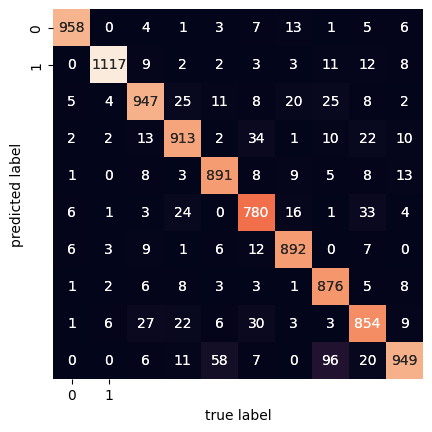

In [30]:
# compare the two models using the testing dataset

predictions1 = model_1.predict(X_test)
prediction_class1 = np.argmax(predictions1, axis=1)

mat = confusion_matrix(y_test, prediction_class1)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=(0,1), yticklabels=(0,1))
plt.xlabel('true label')
plt.ylabel('predicted label');

print(accuracy_score(y_test, prediction_class1))

predictions2 = model_2.predict(X_test)
prediction_class2 = np.argmax(predictions2, axis=1)

mat2 = confusion_matrix(y_test, prediction_class2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=(0,1), yticklabels=(0,1))
plt.xlabel('true label')
plt.ylabel('predicted label');

print(accuracy_score(y_test, prediction_class2))

# accuracy improved from 91.8% to 98%. Therefore the second model performs better on the test data


Epoch 1/5


/var/folders/f8/x7313zpd31v5yyfbr5c8sf840000gn/T/ipykernel_32997/1046575882.py:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = buildModel)


96/96 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.8947
Epoch 2/5
96/96 [==============================] - 0s 3ms/step - loss: 0.1431 - accuracy: 0.9569
Epoch 3/5
96/96 [==============================] - 0s 3ms/step - loss: 0.1111 - accuracy: 0.9655
Epoch 4/5
96/96 [==============================] - 0s 3ms/step - loss: 0.0894 - accuracy: 0.9712
Epoch 5/5
24/24 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9752
Epoch 1/5
96/96 [==============================] - 0s 3ms/step - loss: 0.3340 - accuracy: 0.8967
Epoch 2/5
96/96 [==============================] - 0s 3ms/step - loss: 0.1428 - accuracy: 0.9560
Epoch 3/5
96/96 [==============================] - 0s 3ms/step - loss: 0.1070 - accuracy: 0.9666
Epoch 4/5
96/96 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 0.9736
Epoch 5/5
24/24 [==============================] - 0s 2ms/step - loss: 0.1072 - accuracy: 0.9689
Epoch 1/5
96/96 [=======================

96/96 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9791
Epoch 7/10
96/96 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.9815
Epoch 8/10
96/96 [==============================] - 0s 3ms/step - loss: 0.0541 - accuracy: 0.9818
Epoch 9/10
96/96 [==============================] - 0s 3ms/step - loss: 0.0507 - accuracy: 0.9834
Epoch 10/10
24/24 [==============================] - 0s 2ms/step - loss: 0.0959 - accuracy: 0.9750
Epoch 1/10
120/120 [==============================] - 1s 3ms/step - loss: 0.3027 - accuracy: 0.9073
Epoch 2/10
120/120 [==============================] - 0s 3ms/step - loss: 0.1340 - accuracy: 0.9587
Epoch 3/10
120/120 [==============================] - 0s 3ms/step - loss: 0.1023 - accuracy: 0.9683
Epoch 4/10
120/120 [==============================] - 0s 3ms/step - loss: 0.0861 - accuracy: 0.9733
Epoch 5/10
120/120 [==============================] - 0s 3ms/step - loss: 0.0703 - accuracy: 0.9770
Epoch 6/10
120/120 [

96/96 [==============================] - 0s 3ms/step - loss: 0.0710 - accuracy: 0.9777
Epoch 6/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9789
Epoch 7/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0605 - accuracy: 0.9802
Epoch 8/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.9815
Epoch 9/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9827
Epoch 10/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9831
Epoch 11/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9858
Epoch 12/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9860
Epoch 13/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9863
Epoch 14/20
96/96 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9856
Epoch 15/20
96/96 [=======

96/96 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9892
Epoch 27/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9890
Epoch 28/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9891
Epoch 29/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9901
Epoch 30/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9892
Epoch 31/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9910
Epoch 32/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9901
Epoch 33/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9894
Epoch 34/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9907
Epoch 35/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9908
Epoch 36/50
96/96 [===

96/96 [==============================] - 0s 3ms/step - loss: 0.0588 - accuracy: 0.9798
Epoch 8/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0557 - accuracy: 0.9816
Epoch 9/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9829
Epoch 10/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9859
Epoch 11/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9854
Epoch 12/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0480 - accuracy: 0.9834
Epoch 13/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9856
Epoch 14/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9860
Epoch 15/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9871
Epoch 16/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9866
Epoch 17/50
96/96 [=====

96/96 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9920
Epoch 40/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9920
Epoch 41/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9918
Epoch 42/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9920
Epoch 43/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9907
Epoch 44/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9914
Epoch 45/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9918
Epoch 46/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9915
Epoch 47/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9917
Epoch 48/50
96/96 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9929
Epoch 49/50
96/96 [===

120/120 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9867
Epoch 20/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9873
Epoch 21/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9872
Epoch 22/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9886
Epoch 23/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9884
Epoch 24/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9885
Epoch 25/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9886
Epoch 26/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9896
Epoch 27/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9891
Epoch 28/50
120/120 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9884
Ep

96/96 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9922
Epoch 52/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9926
Epoch 53/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9926
Epoch 54/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9926
Epoch 55/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9921
Epoch 56/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9921
Epoch 57/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9929
Epoch 58/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9928
Epoch 59/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9929
Epoch 60/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9934
Epoch 61/80
96/96 [===

96/96 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9924
Epoch 54/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9918
Epoch 55/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9925
Epoch 56/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9921
Epoch 57/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9929
Epoch 58/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9913
Epoch 59/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9923
Epoch 60/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0331 - accuracy: 0.9913
Epoch 61/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9927
Epoch 62/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9914
Epoch 63/80
96/96 [===

96/96 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9912
Epoch 56/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9916
Epoch 57/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9923
Epoch 58/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9927
Epoch 59/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9919
Epoch 60/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9923
Epoch 61/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9932
Epoch 62/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9924
Epoch 63/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9915
Epoch 64/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9931
Epoch 65/80
96/96 [===

96/96 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9925
Epoch 58/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9935
Epoch 59/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9933
Epoch 60/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9930
Epoch 61/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9932
Epoch 62/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9929
Epoch 63/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9917
Epoch 64/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9930
Epoch 65/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9926
Epoch 66/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9923
Epoch 67/80
96/96 [===

96/96 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9925
Epoch 60/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9924
Epoch 61/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9928
Epoch 62/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9924
Epoch 63/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9936
Epoch 64/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9934
Epoch 65/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9927
Epoch 66/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9929
Epoch 67/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9934
Epoch 68/80
96/96 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9930
Epoch 69/80
96/96 [===

120/120 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9924
Epoch 60/80
120/120 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9927
Epoch 61/80
120/120 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9928
Epoch 62/80
120/120 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9937
Epoch 63/80
120/120 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9941
Epoch 64/80
120/120 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9924
Epoch 65/80
120/120 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9923
Epoch 66/80
120/120 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9914
Epoch 67/80
120/120 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9933
Epoch 68/80
120/120 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9927
Ep

96/96 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9933
Epoch 61/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9926
Epoch 62/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9921
Epoch 63/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9921
Epoch 64/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9919
Epoch 65/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9923
Epoch 66/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9927
Epoch 67/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9922
Epoch 68/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9932
Epoch 69/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9931
Epoch 70/100


96/96 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9906
Epoch 42/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9908
Epoch 43/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9919
Epoch 44/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9898
Epoch 45/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9914
Epoch 46/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9903
Epoch 47/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9919
Epoch 48/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9900
Epoch 49/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9899
Epoch 50/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9907
Epoch 51/100


96/96 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9885
Epoch 23/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9884
Epoch 24/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9889
Epoch 25/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9891
Epoch 26/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9887
Epoch 27/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9877
Epoch 28/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9891
Epoch 29/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9898
Epoch 30/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9905
Epoch 31/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9896
Epoch 32/100


96/96 [==============================] - 0s 3ms/step - loss: 0.1004 - accuracy: 0.9688
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0838 - accuracy: 0.9736
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0706 - accuracy: 0.9768
Epoch 6/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 0.9793
Epoch 7/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9822
Epoch 8/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 0.9816
Epoch 9/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9842
Epoch 10/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0471 - accuracy: 0.9843
Epoch 11/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9854
Epoch 12/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0440 - accuracy: 0.9849
Epoch 13/100
96/96 

96/96 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9944
Epoch 86/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9937
Epoch 87/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9940
Epoch 88/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9931
Epoch 89/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9933
Epoch 90/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9928
Epoch 91/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9941
Epoch 92/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9937
Epoch 93/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9937
Epoch 94/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9930
Epoch 95/100


96/96 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9925
Epoch 67/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9917
Epoch 68/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9923
Epoch 69/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9932
Epoch 70/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9926
Epoch 71/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9929
Epoch 72/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9944
Epoch 73/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9936
Epoch 74/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9931
Epoch 75/100
96/96 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9940
Epoch 76/100


120/120 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9913
Epoch 47/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0372 - accuracy: 0.9902
Epoch 48/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9920
Epoch 49/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9918
Epoch 50/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9911
Epoch 51/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9903
Epoch 52/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9917
Epoch 53/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9921
Epoch 54/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9919
Epoch 55/100
120/120 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 

96/96 [==============================] - 0s 3ms/step - loss: 0.0370 - accuracy: 0.9886
Epoch 28/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9890
Epoch 29/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9893
Epoch 30/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9904
Epoch 31/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9905
Epoch 32/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9894
Epoch 33/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9877
Epoch 34/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9897
Epoch 35/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9901
Epoch 36/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9914
Epoch 37/120


Epoch 109/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9941
Epoch 110/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9940
Epoch 111/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9939
Epoch 112/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9949
Epoch 113/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9946
Epoch 114/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9944
Epoch 115/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9944
Epoch 116/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9939
Epoch 117/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9950
Epoch 118/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0271 - accurac

96/96 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9923
Epoch 71/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9923
Epoch 72/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9920
Epoch 73/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9925
Epoch 74/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9931
Epoch 75/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9934
Epoch 76/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9944
Epoch 77/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9936
Epoch 78/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9939
Epoch 79/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9940
Epoch 80/120


96/96 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9905
Epoch 32/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9890
Epoch 33/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9899
Epoch 34/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9888
Epoch 35/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9905
Epoch 36/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9897
Epoch 37/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9892
Epoch 38/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9914
Epoch 39/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9907
Epoch 40/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9893
Epoch 41/120


96/96 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9945
Epoch 113/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9944
Epoch 114/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9945
Epoch 115/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9927
Epoch 116/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9941
Epoch 117/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9949
Epoch 118/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0167 - accuracy: 0.9960
Epoch 119/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9956
Epoch 120/120
24/24 [==============================] - 0s 2ms/step - loss: 0.3324 - accuracy: 0.9757
Epoch 1/120
96/96 [==============================] - 0s 3ms/step - loss: 0.3548 - accuracy: 0.8904
Epoch 

96/96 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9936
Epoch 74/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9933
Epoch 75/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9934
Epoch 76/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9930
Epoch 77/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9937
Epoch 78/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9931
Epoch 79/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9935
Epoch 80/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9942
Epoch 81/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9934
Epoch 82/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9941
Epoch 83/120


96/96 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9899
Epoch 35/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9891
Epoch 36/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9906
Epoch 37/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9905
Epoch 38/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9918
Epoch 39/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9906
Epoch 40/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9902
Epoch 41/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9908
Epoch 42/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9917
Epoch 43/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9900
Epoch 44/120


96/96 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9939
Epoch 116/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9943
Epoch 117/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9948
Epoch 118/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9940
Epoch 119/120
96/96 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9940
Epoch 120/120
24/24 [==============================] - 0s 2ms/step - loss: 0.3249 - accuracy: 0.9783
Epoch 1/120
120/120 [==============================] - 1s 3ms/step - loss: 0.3010 - accuracy: 0.9070
Epoch 2/120
120/120 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.9608
Epoch 3/120
120/120 [==============================] - 0s 3ms/step - loss: 0.0999 - accuracy: 0.9687
Epoch 4/120
120/120 [==============================] - 0s 3ms/step - loss: 0.0851 - accuracy: 0.9733
Epoc

120/120 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9927
Epoch 75/120
120/120 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9935
Epoch 76/120
120/120 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9928
Epoch 77/120
120/120 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9931
Epoch 78/120
120/120 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9934
Epoch 79/120
120/120 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9931
Epoch 80/120
120/120 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9935
Epoch 81/120
120/120 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9930
Epoch 82/120
120/120 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9926
Epoch 83/120
120/120 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 

Epoch 35/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9885
Epoch 36/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9906
Epoch 37/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9895
Epoch 38/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9911
Epoch 39/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9913
Epoch 40/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9913
Epoch 41/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9904
Epoch 42/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9902
Epoch 43/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9913
Epoch 44/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9899


96/96 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9944
Epoch 117/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9932
Epoch 118/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9941
Epoch 119/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9942
Epoch 120/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9937
Epoch 121/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9938
Epoch 122/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9948
Epoch 123/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9948
Epoch 124/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9949
Epoch 125/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9949
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9916
Epoch 47/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9919
Epoch 48/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9920
Epoch 49/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9913
Epoch 50/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9920
Epoch 51/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9918
Epoch 52/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9927
Epoch 53/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9921
Epoch 54/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9912
Epoch 55/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9907
Epoch 56/150


96/96 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9949
Epoch 128/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9954
Epoch 129/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9951
Epoch 130/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9946
Epoch 131/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9942
Epoch 132/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9947
Epoch 133/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9943
Epoch 134/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9948
Epoch 135/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9945
Epoch 136/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9955
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9930
Epoch 59/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9924
Epoch 60/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9931
Epoch 61/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9930
Epoch 62/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9926
Epoch 63/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9922
Epoch 64/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9918
Epoch 65/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9923
Epoch 66/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9938
Epoch 67/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9937
Epoch 68/150


96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9952
Epoch 140/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9954
Epoch 141/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9950
Epoch 142/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9951
Epoch 143/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9954
Epoch 144/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9958
Epoch 145/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9958
Epoch 146/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9954
Epoch 147/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9956
Epoch 148/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9948
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9938
Epoch 71/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9945
Epoch 72/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9939
Epoch 73/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9930
Epoch 74/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9931
Epoch 75/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9929
Epoch 76/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9926
Epoch 77/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9929
Epoch 78/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9927
Epoch 79/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9928
Epoch 80/150


24/24 [==============================] - 0s 2ms/step - loss: 0.4320 - accuracy: 0.9741
Epoch 1/150
96/96 [==============================] - 0s 3ms/step - loss: 0.3557 - accuracy: 0.8902
Epoch 2/150
96/96 [==============================] - 0s 3ms/step - loss: 0.1475 - accuracy: 0.9550
Epoch 3/150
96/96 [==============================] - 0s 3ms/step - loss: 0.1124 - accuracy: 0.9651
Epoch 4/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0956 - accuracy: 0.9697
Epoch 5/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.9745
Epoch 6/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0727 - accuracy: 0.9767
Epoch 7/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0614 - accuracy: 0.9799
Epoch 8/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9803
Epoch 9/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0523 - accuracy: 0.9830
Epoch 10/150
96/96 [==

96/96 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9935
Epoch 83/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9925
Epoch 84/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9929
Epoch 85/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9931
Epoch 86/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9926
Epoch 87/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9931
Epoch 88/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9935
Epoch 89/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9935
Epoch 90/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9940
Epoch 91/150
96/96 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9940
Epoch 92/150


120/120 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9840
Epoch 13/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0464 - accuracy: 0.9848
Epoch 14/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9858
Epoch 15/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9862
Epoch 16/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9859
Epoch 17/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9869
Epoch 18/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9879
Epoch 19/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0407 - accuracy: 0.9866
Epoch 20/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9880
Epoch 21/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9951
Epoch 93/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9946
Epoch 94/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9941
Epoch 95/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9940
Epoch 96/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9934
Epoch 97/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9941
Epoch 98/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9941
Epoch 99/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9947
Epoch 100/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9942
Epoch 101/150
120/120 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy

96/96 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9882
Epoch 23/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9883
Epoch 24/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9881
Epoch 25/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9888
Epoch 26/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9888
Epoch 27/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9889
Epoch 28/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9887
Epoch 29/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9885
Epoch 30/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9899
Epoch 31/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9891
Epoch 32/180


96/96 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9944
Epoch 105/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9937
Epoch 106/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9940
Epoch 107/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9942
Epoch 108/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9942
Epoch 109/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9947
Epoch 110/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9949
Epoch 111/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9941
Epoch 112/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9952
Epoch 113/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9939
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0853 - accuracy: 0.9725
Epoch 5/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0726 - accuracy: 0.9769
Epoch 6/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0631 - accuracy: 0.9799
Epoch 7/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0565 - accuracy: 0.9816
Epoch 8/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0551 - accuracy: 0.9818
Epoch 9/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0516 - accuracy: 0.9829
Epoch 10/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9848
Epoch 11/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0454 - accuracy: 0.9851
Epoch 12/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0413 - accuracy: 0.9859
Epoch 13/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9866
Epoch 14/180
96/96

96/96 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9920
Epoch 87/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9925
Epoch 88/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9932
Epoch 89/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9937
Epoch 90/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9945
Epoch 91/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9940
Epoch 92/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9941
Epoch 93/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9946
Epoch 94/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9952
Epoch 95/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9944
Epoch 96/180


96/96 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9955
Epoch 168/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9953
Epoch 169/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9955
Epoch 170/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9953
Epoch 171/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9961
Epoch 172/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9958
Epoch 173/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9963
Epoch 174/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9958
Epoch 175/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9956
Epoch 176/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9954
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9919
Epoch 69/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9918
Epoch 70/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9922
Epoch 71/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9935
Epoch 72/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9946
Epoch 73/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9931
Epoch 74/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9929
Epoch 75/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9934
Epoch 76/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9936
Epoch 77/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9929
Epoch 78/180


96/96 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9959
Epoch 150/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9951
Epoch 151/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9956
Epoch 152/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9961
Epoch 153/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9955
Epoch 154/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9957
Epoch 155/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9951
Epoch 156/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9959
Epoch 157/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9957
Epoch 158/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9955
Epoc

Epoch 50/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9923
Epoch 51/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9913
Epoch 52/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9923
Epoch 53/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9923
Epoch 54/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9925
Epoch 55/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9933
Epoch 56/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9923
Epoch 57/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9928
Epoch 58/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9931
Epoch 59/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9915


96/96 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9956
Epoch 132/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9950
Epoch 133/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9955
Epoch 134/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9950
Epoch 135/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9950
Epoch 136/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9956
Epoch 137/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9958
Epoch 138/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9957
Epoch 139/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9961
Epoch 140/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9959
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9888
Epoch 32/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9900
Epoch 33/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9899
Epoch 34/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9883
Epoch 35/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9898
Epoch 36/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9904
Epoch 37/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9889
Epoch 38/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9893
Epoch 39/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0325 - accuracy: 0.9904
Epoch 40/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9910
Epoch 41/180


96/96 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9950
Epoch 113/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9941
Epoch 114/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9935
Epoch 115/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9936
Epoch 116/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9945
Epoch 117/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9941
Epoch 118/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9950
Epoch 119/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9945
Epoch 120/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9944
Epoch 121/180
96/96 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9945
Epoc

120/120 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9839
Epoch 13/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9852
Epoch 14/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9857
Epoch 15/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9865
Epoch 16/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0406 - accuracy: 0.9868
Epoch 17/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9865
Epoch 18/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0426 - accuracy: 0.9862
Epoch 19/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0444 - accuracy: 0.9855
Epoch 20/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9867
Epoch 21/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9937
Epoch 93/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9938
Epoch 94/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9933
Epoch 95/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9935
Epoch 96/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9929
Epoch 97/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9933
Epoch 98/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9937
Epoch 99/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9928
Epoch 100/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9926
Epoch 101/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy

120/120 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9947
Epoch 172/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9951
Epoch 173/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9955
Epoch 174/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9946
Epoch 175/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9956
Epoch 176/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9955
Epoch 177/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9952
Epoch 178/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9950
Epoch 179/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9949
Epoch 180/180
120/120 [==============================] - 0s 3ms/step - loss: 0.0245 - a

96/96 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9916
Epoch 73/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9932
Epoch 74/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9932
Epoch 75/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9937
Epoch 76/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9942
Epoch 77/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9933
Epoch 78/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9929
Epoch 79/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9929
Epoch 80/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9938
Epoch 81/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9941
Epoch 82/200


96/96 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9953
Epoch 154/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9957
Epoch 155/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9956
Epoch 156/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9959
Epoch 157/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9953
Epoch 158/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9954
Epoch 159/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9957
Epoch 160/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9955
Epoch 161/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9959
Epoch 162/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0190 - accuracy: 0.9966
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9890
Epoch 34/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9889
Epoch 35/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9902
Epoch 36/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9910
Epoch 37/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9905
Epoch 38/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9913
Epoch 39/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9915
Epoch 40/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9916
Epoch 41/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9917
Epoch 42/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9908
Epoch 43/200


96/96 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9937
Epoch 115/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9947
Epoch 116/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9953
Epoch 117/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9953
Epoch 118/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9953
Epoch 119/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0338 - accuracy: 0.9936
Epoch 120/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9938
Epoch 121/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9941
Epoch 122/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9949
Epoch 123/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9950
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9965
Epoch 196/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9963
Epoch 197/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9967
Epoch 198/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9966
Epoch 199/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9965
Epoch 200/200
24/24 [==============================] - 0s 2ms/step - loss: 0.5600 - accuracy: 0.9741
Epoch 1/200
96/96 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.8998
Epoch 2/200
96/96 [==============================] - 0s 3ms/step - loss: 0.1403 - accuracy: 0.9572
Epoch 3/200
96/96 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.9674
Epoch 4/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0823 - accuracy: 0.9735
Epoch 5/200


96/96 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9931
Epoch 77/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9934
Epoch 78/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9947
Epoch 79/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9939
Epoch 80/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9937
Epoch 81/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9934
Epoch 82/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9937
Epoch 83/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9941
Epoch 84/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9937
Epoch 85/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9943
Epoch 86/200


96/96 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9953
Epoch 158/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9956
Epoch 159/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9960
Epoch 160/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9956
Epoch 161/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9957
Epoch 162/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9950
Epoch 163/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9962
Epoch 164/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9956
Epoch 165/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9961
Epoch 166/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9958
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9916
Epoch 38/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9903
Epoch 39/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9902
Epoch 40/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9912
Epoch 41/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9903
Epoch 42/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9916
Epoch 43/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9910
Epoch 44/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9906
Epoch 45/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9924
Epoch 46/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9899
Epoch 47/200


96/96 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9947
Epoch 119/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9950
Epoch 120/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9940
Epoch 121/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9939
Epoch 122/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0202 - accuracy: 0.9954
Epoch 123/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0200 - accuracy: 0.9955
Epoch 124/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9953
Epoch 125/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9949
Epoch 126/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9951
Epoch 127/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9952
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9968
Epoch 200/200
24/24 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.9735
Epoch 1/200
96/96 [==============================] - 0s 3ms/step - loss: 0.3602 - accuracy: 0.8885
Epoch 2/200
96/96 [==============================] - 0s 3ms/step - loss: 0.1479 - accuracy: 0.9554
Epoch 3/200
96/96 [==============================] - 0s 3ms/step - loss: 0.1099 - accuracy: 0.9660
Epoch 4/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9717
Epoch 5/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.9742
Epoch 6/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0689 - accuracy: 0.9777
Epoch 7/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0595 - accuracy: 0.9798
Epoch 8/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0578 - accuracy: 0.9804
Epoch 9/200
96/96 [=

96/96 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9936
Epoch 81/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9938
Epoch 82/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9929
Epoch 83/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9923
Epoch 84/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9931
Epoch 85/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9937
Epoch 86/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9945
Epoch 87/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9935
Epoch 88/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9936
Epoch 89/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9947
Epoch 90/200


96/96 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9959
Epoch 162/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9955
Epoch 163/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9955
Epoch 164/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.9960
Epoch 165/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9958
Epoch 166/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0172 - accuracy: 0.9965
Epoch 167/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9956
Epoch 168/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9952
Epoch 169/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9949
Epoch 170/200
96/96 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9950
Epoc

120/120 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9917
Epoch 42/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9911
Epoch 43/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9906
Epoch 44/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9916
Epoch 45/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9907
Epoch 46/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9920
Epoch 47/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9910
Epoch 48/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9921
Epoch 49/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9919
Epoch 50/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9948
Epoch 122/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9945
Epoch 123/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9945
Epoch 124/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9956
Epoch 125/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9947
Epoch 126/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9947
Epoch 127/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9953
Epoch 128/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9943
Epoch 129/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9942
Epoch 130/200
120/120 [==============================] - 0s 3ms/step - loss: 0.0244 - a

120/120 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9963
Epoch 1/250
96/96 [==============================] - 0s 3ms/step - loss: 0.3294 - accuracy: 0.8989
Epoch 2/250
96/96 [==============================] - 0s 3ms/step - loss: 0.1427 - accuracy: 0.9563
Epoch 3/250
96/96 [==============================] - 0s 3ms/step - loss: 0.1055 - accuracy: 0.9667
Epoch 4/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0858 - accuracy: 0.9728
Epoch 5/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0758 - accuracy: 0.9756
Epoch 6/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0655 - accuracy: 0.9779
Epoch 7/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0600 - accuracy: 0.9800
Epoch 8/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9824
Epoch 9/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9824
Epoch 10/250
96/96 [

96/96 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9926
Epoch 83/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9937
Epoch 84/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9936
Epoch 85/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9936
Epoch 86/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9929
Epoch 87/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9942
Epoch 88/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9939
Epoch 89/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9939
Epoch 90/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9937
Epoch 91/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9937
Epoch 92/250


96/96 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.9962
Epoch 164/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9958
Epoch 165/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9957
Epoch 166/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9950
Epoch 167/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9956
Epoch 168/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9954
Epoch 169/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9962
Epoch 170/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9952
Epoch 171/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9960
Epoch 172/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9955
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9965
Epoch 245/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9967
Epoch 246/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9965
Epoch 247/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9967
Epoch 248/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9962
Epoch 249/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9964
Epoch 250/250
24/24 [==============================] - 0s 1ms/step - loss: 0.5474 - accuracy: 0.9788
Epoch 1/250
96/96 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.8939
Epoch 2/250
96/96 [==============================] - 0s 3ms/step - loss: 0.1397 - accuracy: 0.9576
Epoch 3/250
96/96 [==============================] - 0s 3ms/step - loss: 0.1074 - accuracy: 0.9672
Epoch 4/25

96/96 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9936
Epoch 76/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9939
Epoch 77/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9938
Epoch 78/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9932
Epoch 79/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9936
Epoch 80/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9927
Epoch 81/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9937
Epoch 82/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9937
Epoch 83/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9940
Epoch 84/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9939
Epoch 85/250


96/96 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9957
Epoch 157/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9963
Epoch 158/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9956
Epoch 159/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9957
Epoch 160/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9951
Epoch 161/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9950
Epoch 162/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0188 - accuracy: 0.9962
Epoch 163/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0216 - accuracy: 0.9959
Epoch 164/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9956
Epoch 165/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9955
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9964
Epoch 238/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9965
Epoch 239/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9961
Epoch 240/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9966
Epoch 241/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9960
Epoch 242/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9963
Epoch 243/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9963
Epoch 244/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9956
Epoch 245/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9959
Epoch 246/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9961
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9929
Epoch 69/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9931
Epoch 70/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9928
Epoch 71/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9928
Epoch 72/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9918
Epoch 73/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9927
Epoch 74/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9930
Epoch 75/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9933
Epoch 76/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9946
Epoch 77/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9933
Epoch 78/250


96/96 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9958
Epoch 150/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9950
Epoch 151/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9946
Epoch 152/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9947
Epoch 153/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9954
Epoch 154/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9951
Epoch 155/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9944
Epoch 156/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9950
Epoch 157/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9962
Epoch 158/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9952
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9961
Epoch 231/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9961
Epoch 232/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9968
Epoch 233/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9966
Epoch 234/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9962
Epoch 235/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9961
Epoch 236/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9960
Epoch 237/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9961
Epoch 238/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9962
Epoch 239/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9965
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9921
Epoch 62/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9923
Epoch 63/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9924
Epoch 64/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9933
Epoch 65/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9935
Epoch 66/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9930
Epoch 67/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9934
Epoch 68/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9932
Epoch 69/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0319 - accuracy: 0.9921
Epoch 70/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9923
Epoch 71/250


96/96 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9959
Epoch 143/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9956
Epoch 144/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9949
Epoch 145/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9942
Epoch 146/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9948
Epoch 147/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9954
Epoch 148/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9949
Epoch 149/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9955
Epoch 150/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9959
Epoch 151/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9955
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9960
Epoch 224/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9965
Epoch 225/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9957
Epoch 226/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9960
Epoch 227/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9952
Epoch 228/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9962
Epoch 229/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9964
Epoch 230/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9958
Epoch 231/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9962
Epoch 232/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9962
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0298 - accuracy: 0.9915
Epoch 55/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9916
Epoch 56/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9909
Epoch 57/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9907
Epoch 58/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9913
Epoch 59/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9919
Epoch 60/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9931
Epoch 61/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9929
Epoch 62/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9931
Epoch 63/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9935
Epoch 64/250


96/96 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9952
Epoch 136/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9948
Epoch 137/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9944
Epoch 138/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9945
Epoch 139/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9942
Epoch 140/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9954
Epoch 141/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9945
Epoch 142/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9949
Epoch 143/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9949
Epoch 144/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9957
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9964
Epoch 217/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9965
Epoch 218/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9958
Epoch 219/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9959
Epoch 220/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9967
Epoch 221/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9962
Epoch 222/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9959
Epoch 223/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9960
Epoch 224/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9964
Epoch 225/250
96/96 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9963
Epoc

120/120 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9910
Epoch 47/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0364 - accuracy: 0.9902
Epoch 48/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9910
Epoch 49/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9910
Epoch 50/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9903
Epoch 51/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9912
Epoch 52/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9912
Epoch 53/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9911
Epoch 54/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9920
Epoch 55/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9945
Epoch 127/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9944
Epoch 128/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9951
Epoch 129/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9949
Epoch 130/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9945
Epoch 131/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0289 - accuracy: 0.9944
Epoch 132/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9947
Epoch 133/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9945
Epoch 134/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9949
Epoch 135/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0266 - a

120/120 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9958
Epoch 206/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9963
Epoch 207/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9957
Epoch 208/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9960
Epoch 209/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9959
Epoch 210/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9953
Epoch 211/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9961
Epoch 212/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0226 - accuracy: 0.9963
Epoch 213/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9955
Epoch 214/250
120/120 [==============================] - 0s 3ms/step - loss: 0.0246 - a

96/96 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9900
Epoch 36/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9910
Epoch 37/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9894
Epoch 38/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9911
Epoch 39/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 40/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9912
Epoch 41/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9904
Epoch 42/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9897
Epoch 43/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9896
Epoch 44/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9904
Epoch 45/300


96/96 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9936
Epoch 117/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9943
Epoch 118/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9945
Epoch 119/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9950
Epoch 120/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9943
Epoch 121/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9939
Epoch 122/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9946
Epoch 123/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9954
Epoch 124/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9949
Epoch 125/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9949
Epoc

96/96 [==============================] - 0s 4ms/step - loss: 0.0253 - accuracy: 0.9959
Epoch 198/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9962
Epoch 199/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0257 - accuracy: 0.9958
Epoch 200/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0259 - accuracy: 0.9959
Epoch 201/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9960
Epoch 202/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9958
Epoch 203/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9952
Epoch 204/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0216 - accuracy: 0.9964
Epoch 205/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.9968
Epoch 206/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9966
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9972
Epoch 279/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0223 - accuracy: 0.9966
Epoch 280/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9964
Epoch 281/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9974
Epoch 282/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0240 - accuracy: 0.9967
Epoch 283/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0255 - accuracy: 0.9964
Epoch 284/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9965
Epoch 285/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0224 - accuracy: 0.9968
Epoch 286/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9966
Epoch 287/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9967
Epoc

96/96 [==============================] - 0s 4ms/step - loss: 0.0343 - accuracy: 0.9905
Epoch 60/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.9915
Epoch 61/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.9928
Epoch 62/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0246 - accuracy: 0.9935
Epoch 63/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9929
Epoch 64/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9922
Epoch 65/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9926
Epoch 66/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9927
Epoch 67/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9917
Epoch 68/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9923
Epoch 69/300


96/96 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9942
Epoch 141/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9945
Epoch 142/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9939
Epoch 143/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0247 - accuracy: 0.9949
Epoch 144/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9956
Epoch 145/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9951
Epoch 146/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9945
Epoch 147/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9947
Epoch 148/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9941
Epoch 149/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9952
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9967
Epoch 222/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0170 - accuracy: 0.9969
Epoch 223/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9955
Epoch 224/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9961
Epoch 225/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9953
Epoch 226/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9953
Epoch 227/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9955
Epoch 228/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9961
Epoch 229/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9962
Epoch 230/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9962
Epoc

96/96 [==============================] - 1s 3ms/step - loss: 0.3425 - accuracy: 0.8952
Epoch 2/300
96/96 [==============================] - 0s 3ms/step - loss: 0.1387 - accuracy: 0.9586
Epoch 3/300
96/96 [==============================] - 0s 3ms/step - loss: 0.1065 - accuracy: 0.9660
Epoch 4/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0854 - accuracy: 0.9729
Epoch 5/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0765 - accuracy: 0.9754
Epoch 6/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0678 - accuracy: 0.9774
Epoch 7/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0587 - accuracy: 0.9800
Epoch 8/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0536 - accuracy: 0.9821
Epoch 9/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0507 - accuracy: 0.9823
Epoch 10/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0488 - accuracy: 0.9836
Epoch 11/300
96/96 [=

96/96 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9940
Epoch 84/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9943
Epoch 85/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9944
Epoch 86/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9943
Epoch 87/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9940
Epoch 88/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9938
Epoch 89/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9942
Epoch 90/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9942
Epoch 91/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9941
Epoch 92/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0291 - accuracy: 0.9935
Epoch 93/300


96/96 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9952
Epoch 165/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9953
Epoch 166/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9946
Epoch 167/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9952
Epoch 168/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9948
Epoch 169/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9957
Epoch 170/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9954
Epoch 171/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9961
Epoch 172/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9962
Epoch 173/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9963
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9968
Epoch 246/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9964
Epoch 247/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9965
Epoch 248/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9962
Epoch 249/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9964
Epoch 250/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9956
Epoch 251/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9966
Epoch 252/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9965
Epoch 253/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9963
Epoch 254/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 0.9961
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9901
Epoch 26/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9895
Epoch 27/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9901
Epoch 28/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9885
Epoch 29/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9885
Epoch 30/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9887
Epoch 31/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9901
Epoch 32/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9889
Epoch 33/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9907
Epoch 34/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9894
Epoch 35/300


Epoch 107/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0189 - accuracy: 0.9954
Epoch 108/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9945
Epoch 109/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9938
Epoch 110/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.9946
Epoch 111/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.9940
Epoch 112/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0284 - accuracy: 0.9943
Epoch 113/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0237 - accuracy: 0.9952
Epoch 114/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9949
Epoch 115/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0251 - accuracy: 0.9946
Epoch 116/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0311 - accurac

96/96 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9956
Epoch 189/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9955
Epoch 190/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9952
Epoch 191/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9954
Epoch 192/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9967
Epoch 193/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9963
Epoch 194/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9966
Epoch 195/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9960
Epoch 196/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9968
Epoch 197/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9959
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9962
Epoch 270/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9966
Epoch 271/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0252 - accuracy: 0.9965
Epoch 272/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9966
Epoch 273/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9972
Epoch 274/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9970
Epoch 275/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.9978
Epoch 276/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9975
Epoch 277/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9966
Epoch 278/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9960
Epoc

Epoch 50/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9903
Epoch 51/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9910
Epoch 52/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9905
Epoch 53/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9910
Epoch 54/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9924
Epoch 55/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9920
Epoch 56/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9919
Epoch 57/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9925
Epoch 58/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0318 - accuracy: 0.9919
Epoch 59/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9933


96/96 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9952
Epoch 132/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9945
Epoch 133/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0198 - accuracy: 0.9956
Epoch 134/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9956
Epoch 135/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9948
Epoch 136/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9949
Epoch 137/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9948
Epoch 138/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9951
Epoch 139/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9949
Epoch 140/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9951
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9956
Epoch 213/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0218 - accuracy: 0.9960
Epoch 214/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0202 - accuracy: 0.9965
Epoch 215/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0213 - accuracy: 0.9959
Epoch 216/300
96/96 [==============================] - 0s 4ms/step - loss: 0.0236 - accuracy: 0.9960
Epoch 217/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0229 - accuracy: 0.9962
Epoch 218/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9957
Epoch 219/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9967
Epoch 220/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0194 - accuracy: 0.9964
Epoch 221/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9968
Epoc

96/96 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9962
Epoch 294/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0212 - accuracy: 0.9967
Epoch 295/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0219 - accuracy: 0.9971
Epoch 296/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0214 - accuracy: 0.9972
Epoch 297/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9971
Epoch 298/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0203 - accuracy: 0.9971
Epoch 299/300
96/96 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9969
Epoch 300/300
24/24 [==============================] - 0s 2ms/step - loss: 0.6687 - accuracy: 0.9765
Epoch 1/300
120/120 [==============================] - 1s 3ms/step - loss: 0.3082 - accuracy: 0.9058
Epoch 2/300
120/120 [==============================] - 0s 3ms/step - loss: 0.1335 - accuracy: 0.9585
Epoc

120/120 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9926
Epoch 73/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9926
Epoch 74/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9936
Epoch 75/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9921
Epoch 76/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9933
Epoch 77/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.9936
Epoch 78/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9928
Epoch 79/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9927
Epoch 80/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9930
Epoch 81/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 

120/120 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9952
Epoch 152/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9959
Epoch 153/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9951
Epoch 154/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.9951
Epoch 155/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9953
Epoch 156/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9955
Epoch 157/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9946
Epoch 158/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9944
Epoch 159/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9956
Epoch 160/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0296 - a

120/120 [==============================] - 0s 3ms/step - loss: 0.0218 - accuracy: 0.9962
Epoch 231/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9955
Epoch 232/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9960
Epoch 233/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9958
Epoch 234/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0187 - accuracy: 0.9966
Epoch 235/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9962
Epoch 236/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9960
Epoch 237/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9962
Epoch 238/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9960
Epoch 239/300
120/120 [==============================] - 0s 3ms/step - loss: 0.0217 - a

Text(0, 0.5, 'Time taken (in seconds)')

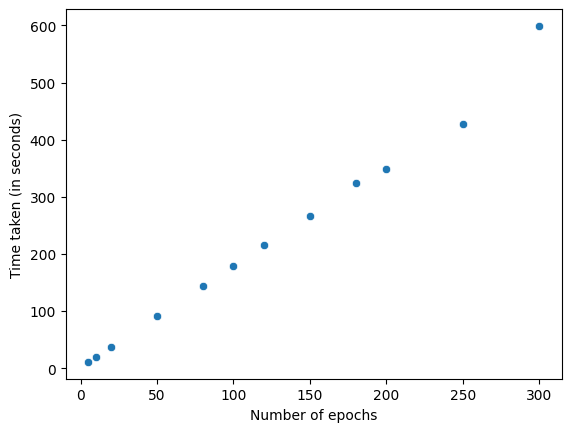

In [32]:
# the training times can also be estimated based on the change on hyperparameters such as number of layers, epoches, learning rate

# the following calculates the training time with the change in the number of epoches

# the model as before
def buildModel(neurons, activation, dropout,learning_rate, kernel_regularizer):
    # Initialising the ANN
    classifier =Sequential([layers.Input((28,28)),                       
                      layers.Lambda(lambda x: x/255), #normalising layer
                      layers.Flatten(),
                      layers.Dense(neurons, activation = activation, kernel_regularizer = L2(kernel_regularizer)),
                      layers.Dropout(dropout), 
                      layers.Dense(10, activation = 'softmax')])
    
    # Compiling the ANN
    classifier.compile(loss='sparse_categorical_crossentropy', 
                       optimizer= Adam(learning_rate = learning_rate), metrics=['accuracy'])
    
    
    return classifier


epochs = []
timelist = []    

# only changing the number of epochs
for i in [5, 10, 20,50, 80, 100, 120, 150, 180, 200, 250, 300]:

    classifier = KerasClassifier(build_fn = buildModel)

    parameters = {'batch_size':  [500],
                  'epochs': [i],
                  "activation": ["relu"],
                  "dropout":[0.2],
                  "learning_rate":[0.01],
                  "kernel_regularizer": [0],
                  "neurons":[182]
                     }
    start = time.time()

    grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters, 
                           cv = 5)

    grid_search = grid_search.fit(X, y)

        
    stop = time.time()
    # recording training times
    timelist.append(np.round(stop - start, 3))
    epochs.append(i)

# printing out the training time and the cross validated scores for different number of estimaters 

# NN traing time
datann = (pd.DataFrame({"time taken" : timelist, "epochs" :epochs}))






Text(0, 0.5, 'Time taken (in seconds)')

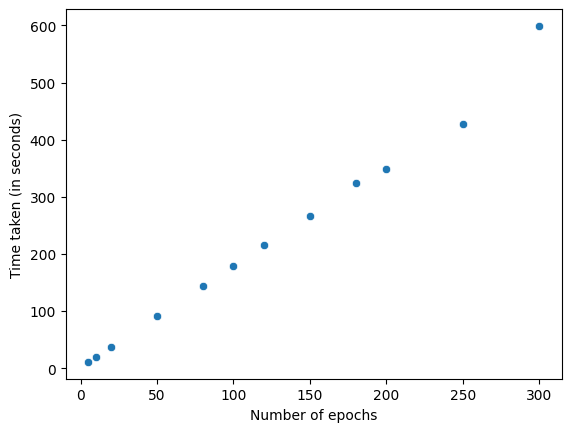

In [34]:
# plotting training time against the number of estimators 
sns.scatterplot( x= datann["epochs"] , y= datann["time taken"])

plt.xlabel("Number of epochs")
plt.ylabel("Time taken (in seconds)")